## Problema de negócio:

O CFO da empresa fez uma reunião com todos os Gerentes de Loja e pediu para que cada um deles trouxesse uma previsão diária das próximas 6 semanas de vendas.

Depois dessa reunião, todos os Gerentes entraram em contato com você requisitando uma previsão de vendas de sua loja. 

Topicos para entender o problema:

1. A motivação (Qual o contexto)?

2. A causa raiz do problema (Pra que fazer isso)?

3. Qual é o dono do problema (Quem está requisitando)?

4. Formato da solução (Como será entregue? Qual granularidade?)

### CRISP - DS

* Cross-Insdutry Process - Data Science

* Método Cíclico de Desenvimento

1. Ciclo completo:

    - 1 Versão End-to-End da Solução.
    - Velocidade na Entrega de Valor.
    - Mapeamento de todos os possíveis problemas.

### Ciclo CRISP-DS

    A[Questão de negócio] 
    A --> B[Entendimento do negócio]
    B --> C[Coleta dos dados]
    C --> D[Limpeza dos dados]
    D --> E[Exploração dos dados]
    E --> F[Modelagem dos dados]
    F --> G[Algoritmos de Machine Learning]
    G --> H[Avaliação do Algoritmo]
    H --> I[Modelo em produção] 
    ou
    H --> B

1. Aula 05 - Descrição dos dados

* Quantidade de dados disponíveis;
* Tipo de variáveis;
* Quantidade de dados faltantes;
* Resumo geral dos dados.

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
import inflection
import math
import datetime
import xgboost as xgb
import random
import warnings
import pickle
import requests
import json

from sklearn.preprocessing      import RobustScaler, MinMaxScaler
from IPython.core.display       import HTML
from IPython.display            import Image
from sklearn.preprocessing      import LabelEncoder
from boruta                     import BorutaPy
from sklearn.ensemble           import RandomForestRegressor
from sklearn.model_selection    import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics            import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline           import Pipeline
from sklearn.compose            import ColumnTransformer
from sklearn.impute             import SimpleImputer
from sklearn.feature_selection  import SelectKBest, f_regression
from sklearn.linear_model       import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose            import make_column_selector as selector
from sklearn.preprocessing      import OneHotEncoder
from sklearn.pipeline           import make_pipeline
from tabulate                   import tabulate
from matplotlib.gridspec        import GridSpec


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## 0.1. Helper Function

In [2]:
# def cross_validation( x_training, kfold, model_name, model, verbose=False ):
#     mae_list = []
#     mape_list = []
#     rmse_list = []
#     for k in reversed( range( 1, kfold+1 ) ):
#         if verbose:
#             print( '\nKFold Number: {}'.format( k ) )
#         # start and end date for validation 
#         validation_start_date = x_training['date'].max() - datetime.timedelta( days=k*6*7)
#         validation_end_date = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7)

#         # filtering dataset
#         training = x_training[x_training['date'] < validation_start_date]
#         validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

#         # training and validation dataset
#         # training
#         xtraining = training.drop( ['date', 'sales'], axis=1 ) 
#         ytraining = training['sales']

#         # validation
#         xvalidation = validation.drop( ['date', 'sales'], axis=1 )
#         yvalidation = validation['sales']

#         # model
#         m = model.fit( xtraining, ytraining )

#         # prediction
#         yhat = m.predict( xvalidation )

#         # performance
#         m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

#         # store performance of each kfold iteration
#         mae_list.append(  m_result['MAE'] )
#         mape_list.append( m_result['MAPE'] )
#         rmse_list.append( m_result['RMSE'] )

#     return pd.DataFrame( {'Model Name': model_name,
#                           'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
#                           'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
#                           'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )


# def mean_percentage_error( y, yhat ):
#     return np.mean( ( y - yhat ) / y )
     
    
# def mean_absolute_percentage_error( y, yhat ):
#     return np.mean( np.abs( ( y - yhat ) / y ) )

    
# def ml_error( model_name, y, yhat ):
#     mae = mean_absolute_error( y, yhat )
#     mape = mean_absolute_percentage_error( y, yhat )
#     rmse = np.sqrt( mean_squared_error( y, yhat ) )
    
#     return pd.DataFrame( { 'Model Name': model_name, 
#                            'MAE': mae, 
#                            'MAPE': mape,
#                            'RMSE': rmse }, index=[0] )

# def cramer_v( x, y ):
#     cm = pd.crosstab( x, y ).as_matrix()
#     n = cm.sum()
#     r, k = cm.shape
    
#     chi2 = ss.chi2_contingency( cm )[0]
#     chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
#     kcorr = k - (k-1)**2/(n-1)
#     rcorr = r - (r-1)**2/(n-1)
    
#     return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )



# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
#     plt.style.use( 'bmh' )
#     plt.rcParams['figure.figsize'] = [25, 12]
#     plt.rcParams['font.size'] = 24
    
#     display( HTML( '<style>.container { width:100% !important; }</style>') )
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', False )
    
#     sns.set()

In [3]:
# Cramér's V com correção de bias
def v_crameer(x, y):
    cm = pd.crosstab(x, y).values
    if cm.size == 0:
        return np.nan
    
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency(cm, correction=False)[0]
    
    if n - 1 == 0:
        chi2corr = 0
        kcorr = k
        rcorr = r
    else:
        chi2corr = max(0, chi2 - (k - 1) * (r - 1) / (n - 1))

        kcorr = k - (k-1)**2/(n - 1)
        rcorr = r - (r-1)**2/(n - 1)

    return np.sqrt((chi2corr/n)/(min(kcorr-1, rcorr-1)))

# MAPE robusto contra divisão por zero
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

# Função de erro consolidada
def ml_error(model_name, y, yhat, inverse_log=False):
    if inverse_log:
        y, yhat = np.expm1(y), np.expm1(yhat)
    
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    r2 = r2_score(y, yhat)
    
    return pd.DataFrame({
        'model': [model_name],
        'mae': [float(mae)],
        'mape': [float(mape)],
        'rmse': [float(rmse)],
        'r2': [float(r2)]
    })

def cross_validation(x_data, y_data, model_name, model, kfold=5, inverse_log=False):
    mae_list, mape_list, rmse_list, r2_list = [], [], [], []
    
    kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
    
    for train_ix, val_ix in kf.split(x_data):
        # Separar folds
        x_train, x_val = x_data.iloc[train_ix], x_data.iloc[val_ix]
        y_train, y_val = y_data.iloc[train_ix], y_data.iloc[val_ix]
        
        # Treinar modelo
        model.fit(x_train, y_train)
        
        # Predição
        yhat = model.predict(x_val)
        
        # Avaliação
        result = ml_error(model_name, y_val, yhat, inverse_log=inverse_log)
        mae_list.append(result['mae'].values[0])
        mape_list.append(result['mape'].values[0])
        rmse_list.append(result['rmse'].values[0])
        r2_list.append(result['r2'].values[0])
    
    # Resultado final
    return pd.DataFrame({
        'model': [model_name],
        'mae': [np.mean(mae_list)],
        'mape': [np.mean(mape_list)],
        'rmse': [np.mean(rmse_list)],
        'r2': [np.mean(r2_list)]
    })

# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
# plt.style.use( 'bmh' )
# plt.rcParams['figure.figsize'] = [25, 12]
# plt.rcParams['font.size'] = 24
    
# display( HTML( '<style>.container { width:100% !important; }</style>') )
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# pd.set_option( 'display.expand_frame_repr', False )
    


In [7]:
# Salve como: C:\Users\bruno.freitas\Documents\repositorio\teste_api_render\convert_pkl_to_ubj.py
import os, json, pickle
import xgboost as xgb

REPO_DIR = r"C:\Users\bruno.freitas\Documents\repositorio\teste_api_render"
OUT_DIR  = os.path.join(REPO_DIR, "model")
PKL_PATH = r"C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao\webapp\model\model_rossman.pkl"

os.makedirs(OUT_DIR, exist_ok=True)

with open(PKL_PATH, "rb") as f:
    model = pickle.load(f)

booster = model.get_booster()
booster.save_model(os.path.join(OUT_DIR, "model_rossman.ubj"))

feature_names = booster.feature_names or [
    "store","promo","store_type","assortment","competition_distance",
    "competition_open_since_month","competition_open_since_year","promo2",
    "promo2_since_week","promo2_since_year","competition_time_month","promo_time_week",
    "day_of_week_sin","day_of_week_cos",
    "week_of_year_cos","week_of_year_sin",
    "month_cos","month_sin",
    "day_sin","day_cos"
]
with open(os.path.join(OUT_DIR, "feature_names.json"), "w", encoding="utf-8") as f:
    json.dump(feature_names, f, ensure_ascii=False, indent=2)

print("OK ->", OUT_DIR)


OK -> C:\Users\bruno.freitas\Documents\repositorio\teste_api_render\model


In [4]:
# jupyter_settings():

## 0.2. Loading Data

In [3]:
df_sales_raw = pd.read_csv(r'C:\Users\bruno.freitas\Documents\repositorio\bases-rossmann\rossmann-store-sales\train.csv', low_memory=False)
df_store_raw = pd.read_csv(r'C:\Users\bruno.freitas\Documents\repositorio\bases-rossmann\rossmann-store-sales\store.csv', low_memory=False)

# Merge the two dataframes on 'Store' column
df_raw = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')

# 1.0 PASSO 01 - Descrição dos dados

In [11]:
df1 = df_raw.copy()

In [12]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.1. Rename Columns

In [13]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Convert column names to snake_case
snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# Rename columns in the dataframe
df1.columns = cols_new

## 1.2. Data Dimensions

In [14]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.2. Data Types

In [15]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [16]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Maneiras de tratar o NA:

* Retirar os NAs (ideia que perde dados gerais)

* Usando estatística (média, moda, mediana, etc...)

* Valores de negócio (tendo cohecimento de negócio podemos substituir por valores reais)


## 1.5 Fillout NA

In [17]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
266512,259,6,2014-11-29,9837,1942,1,0,0,0,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
#competition_distance        
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo2_since_week           
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year           
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#promo_interval              
month_map = {
    1: 'Jan',  
    2: 'Fev',  
    3: 'Mar',  
    4: 'Apr',  
    5: 'May',  
    6: 'Jun',  
    7: 'Jul',  
    8: 'Aug',  
    9: 'Sep',  
    10: 'Oct', 
    11: 'Nov', 
    12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( 
    lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )


In [19]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change data types

In [20]:
# Transformando colunas de tipo float para int (competition_open_since_month, competition_open_since_year)
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

# Transformando colunas de tipo float para int (promo2_since_week, promo2_since_year)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistics

In [21]:
# Separando em variaveis numéricas e categóricas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Atributes

In [22]:
# Tendência central e dispersão (usando métodos vetorizados)
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# # Junção dos DataFrames
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


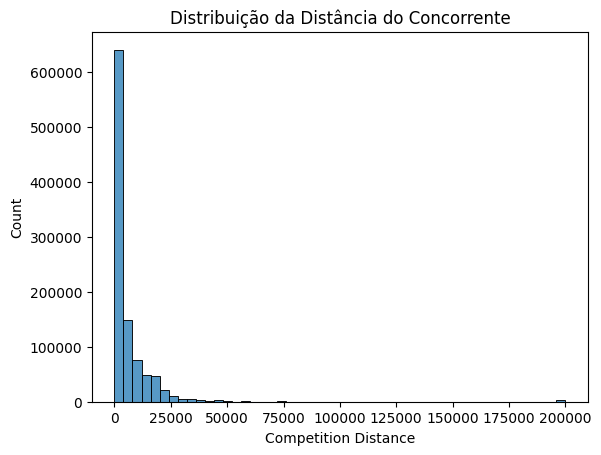

In [23]:
sns.histplot(df1['competition_distance'], bins=50)
plt.xlabel('Competition Distance')
plt.title('Distribuição da Distância do Concorrente')
plt.show()

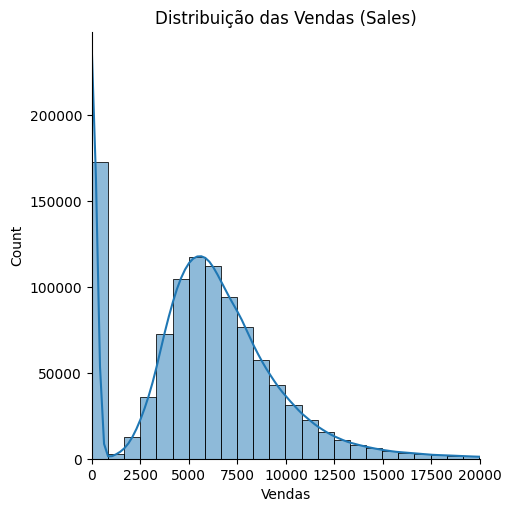

In [24]:
sns.displot(df1['sales'], bins=50, kde=True)
plt.xlim(0, 20000)
plt.title('Distribuição das Vendas (Sales)')
plt.xlabel('Vendas')
plt.show()

### 1.7.2 Categorical Atributes

In [25]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

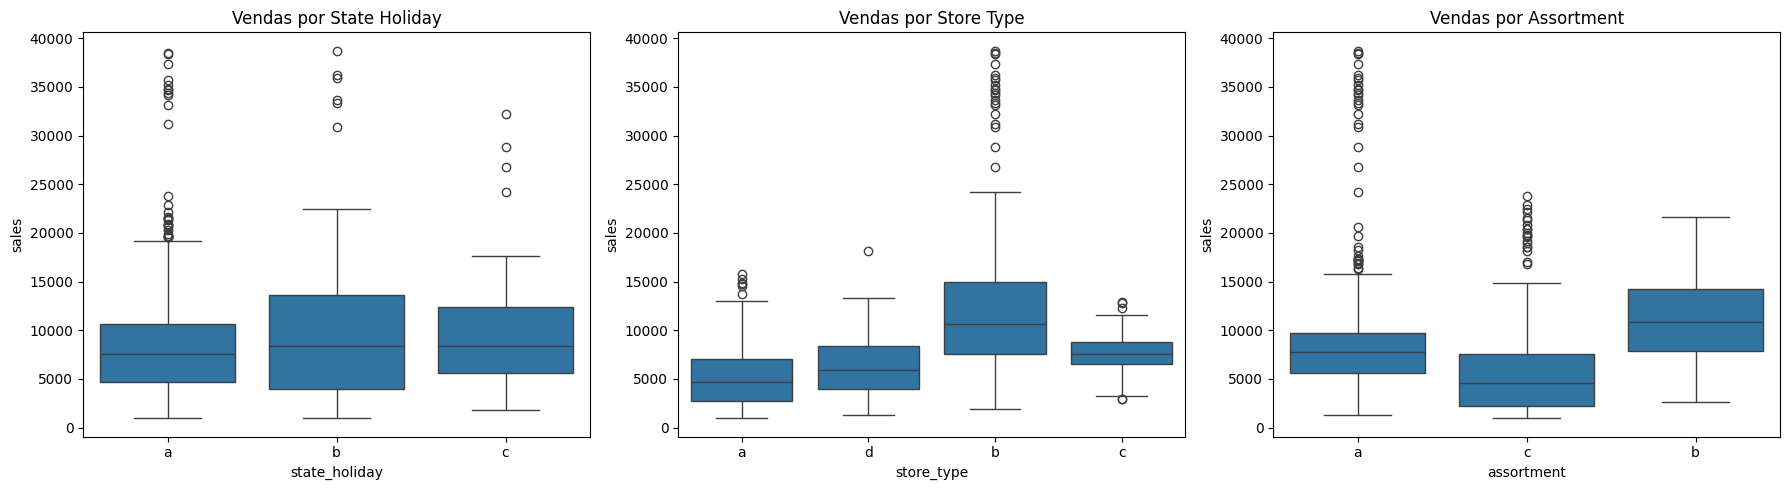

In [26]:
plt.figure(figsize=(18, 5))

aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.title('Vendas por State Holiday')

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.title('Vendas por Store Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)
plt.title('Vendas por Assortment')

plt.tight_layout()
plt.show()

# 2.0. Passo 02 - FEATURE ENGINNERING

In [27]:
df2 = df1.copy()

* Hipótses são apostas

    - Lojas de MAIOR porte...
    deveriam vender MAIS.

    - Lojas com MAIOR sortimento...
    deveriam vender MAIS.

## 2.1. Mapa Mental de Hipoteses

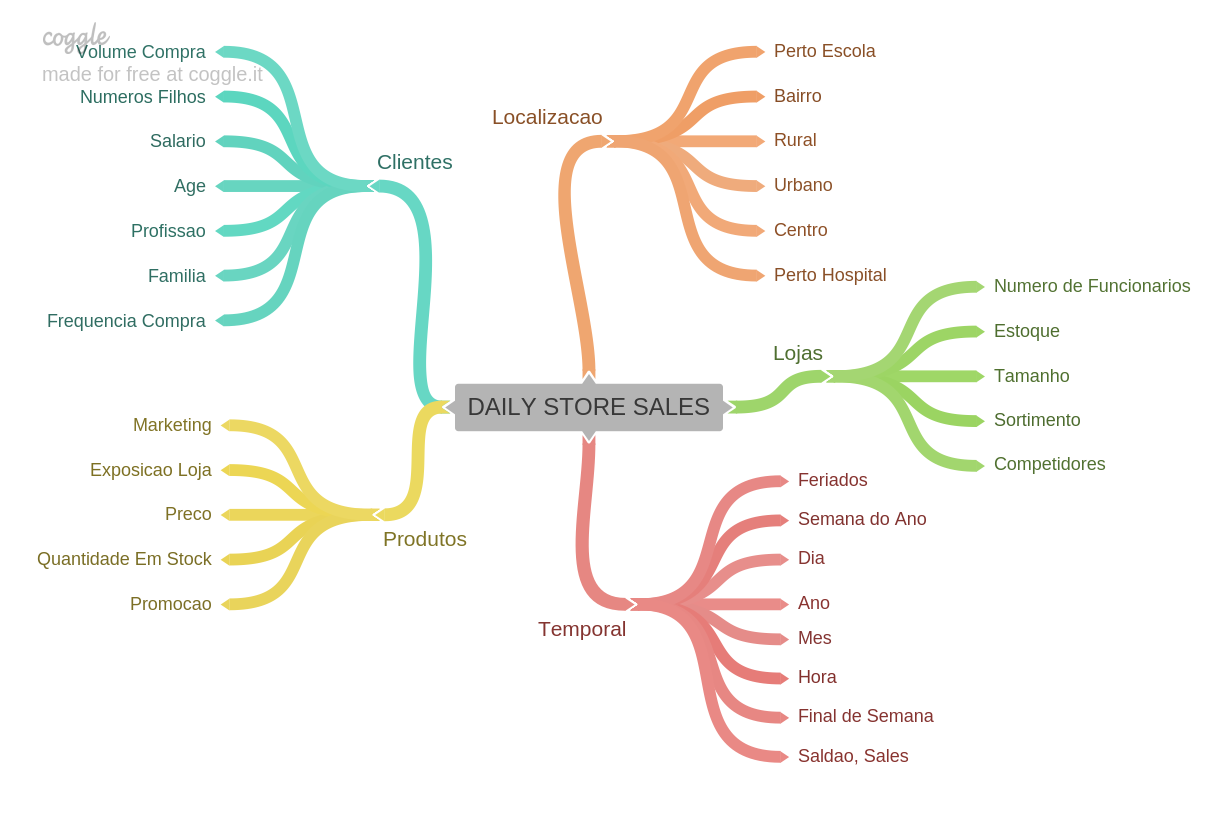

In [28]:
Image(r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao-main\ds_em_producao-main\img\MindMapHypothesis.png' )

📊 Boxplot → MEDAS

   └─ M → Mediana (linha central): Quem vende mais?

   └─ E → Espaço da caixa: Dispersão (estável ou instável?)

   └─ D → Dados extremos (outliers): Muitos valores atípicos?

   └─ A → Assimetria: A caixa está mais para cima ou para baixo?
   
   └─ S → Subgrupos: Qual categoria se destaca? Por quê?


Mapa mental de hipóteses:

* Fenômeno: Qual é o fenômeno que estou modelando?

* Agentes: Quemsão os agentes que atuam sobre o fenômeno de interesse?

* Atributo dos agentes: Descrição dos agentes?

* Lista de hipóteses: Hipóteses para validar os dados

## 2.2. Criação de Hipóteses

### 2.2.1. Hipóteses Loja

**1.** Loja com maior quadro de funcionários deveriam vender mais

**2.** Loja com maior capacidade de estoque deveriam vender mais

**3.** Loja com maior porte deveriam vender mais

**4.** Loja com maior sortimento deveriam vender mais

**5.** Loja com competidores mais proximos deveriam vender menos

**6.** Loja com competidores a mais tempo deveriam vender mais

### 2.2.2. Hipóteses Produto

**1.** Loja que investem mais e Marketing deveriam vender mais

**2.** Loja com maior exposição de produtos deveriam vender mais

**3.** Loja que tem preços menores nos produtos deveriam vender mais

**4.** Loja com promoções agressivas (descontos maiores) deveriam vender mais

**5.** Loja com promoções ativas por mais tempo deveriam vender mais

**6.** Loja com mais dias de promoção deveriam vender mais

**7.** Loja com mais promoções consecutivas deveriam vender mais


### 2.2.3. Hipóteses Tempo

**1.** Loja abertas durante o feriado de Natal deveriam vender mais

**2.** Loja deveriam vender mais ao longo dos anos

**3.** Loja deveriam vender mais no segundo semestre do ano

**4.** Loja deveriam vender mais depois do dia 10 de cada mês

**5.** Loja deveriam vender menos aos finais de semana

**6.** Loja deveriam vender menos durante os feriados escolares

## 2.3. Lista Final de Hipóteses

**1.** Loja com maior sortimento deveriam vender mais

**2.** Loja com competidores mais proximos deveriam vender menos

**3.** Loja com competidores a mais tempo deveriam vender mais

**4.** Loja com promoções ativas por mais tempo deveriam vender mais

**5.** Loja com mais dias de promoção deveriam vender mais

**6.** Loja com mais promoções consecutivas deveriam vender mais

**7.** Loja abertas durante o feriado de Natal deveriam vender mais

**8.** Loja deveriam vender mais ao longo dos anos

**9.** Loja deveriam vender mais no segundo semestre do ano

**10.** Loja deveriam vender mais depois do dia 10 de cada mês

**11.** Loja deveriam vender menos aos finais de semana

**12.** Loja deveriam vender menos durante os feriados escolares

## 2.4. Feature Engineering

In [29]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# yeer week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public' if x == 'a' else 'easter' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


## Filtragem de variáveis x Seleção de variáveis 

- Filtragem de variáveis: restrições de acordo com o negócio

- Seleção de variáveis: variáveis mais relevantes para o modelo

# 3.0. Passo 03 - Filtragem de variáveis

In [30]:
df3 = df2.copy()

### 3.1. Filtragem das linhas

In [31]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

### 3.2. Seleção das colunas

In [32]:
# Colunas a serem removidas
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop(cols_drop, axis=1)

1. Como as variáveis impactam o fenomêno?

2. Qual é a força desse impacto?

### Quais os 3 objetivos da EDA?

* Ganhar experiência de negócio.

* Validar hipoteses de negócios (insights).

* Perceber quais variáveis que são importantes para o modelo.

# 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [33]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Response Variable

Premissas de ML: variáveis independentes, variável resposta seguindo uma distribuição normal

<Axes: xlabel='sales', ylabel='Count'>

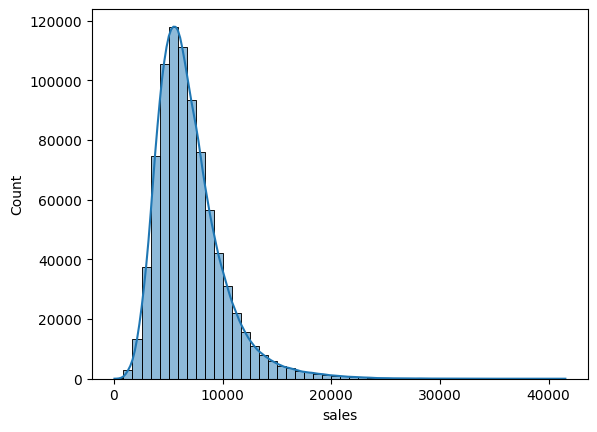

In [34]:
sns.histplot(df4['sales'], bins=50, kde=True)

<Axes: xlabel='sales', ylabel='Count'>

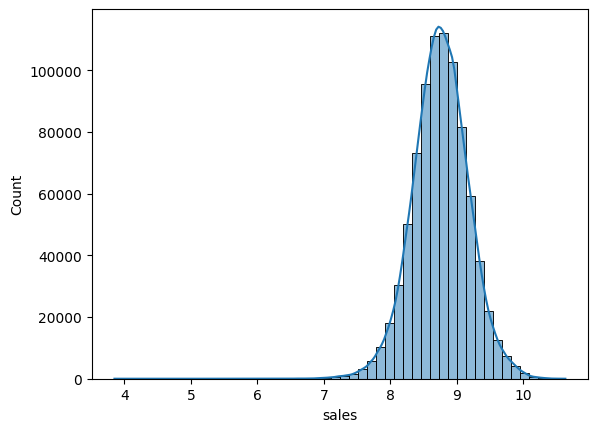

In [35]:
# Deslocando a distribuição para evitar valores zero
sns.histplot(np.log1p(df4['sales']), bins=50, kde=True)

### 4.1.2 Numerical Variable

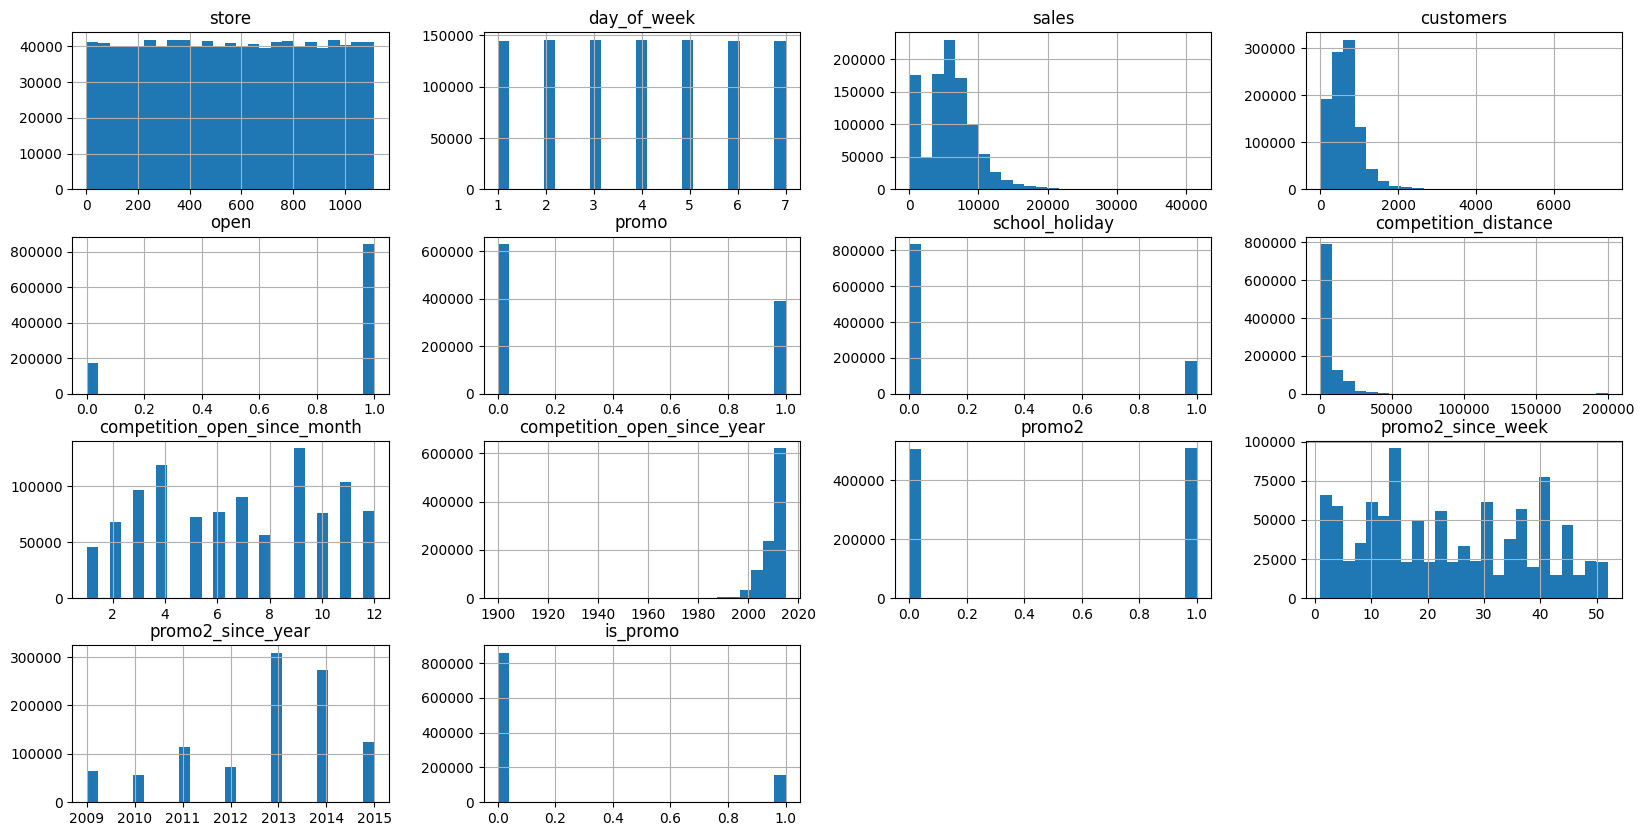

In [36]:
num_attributes.hist(figsize=(20, 10), bins=25);

### 4.1.3 Categorical Variable

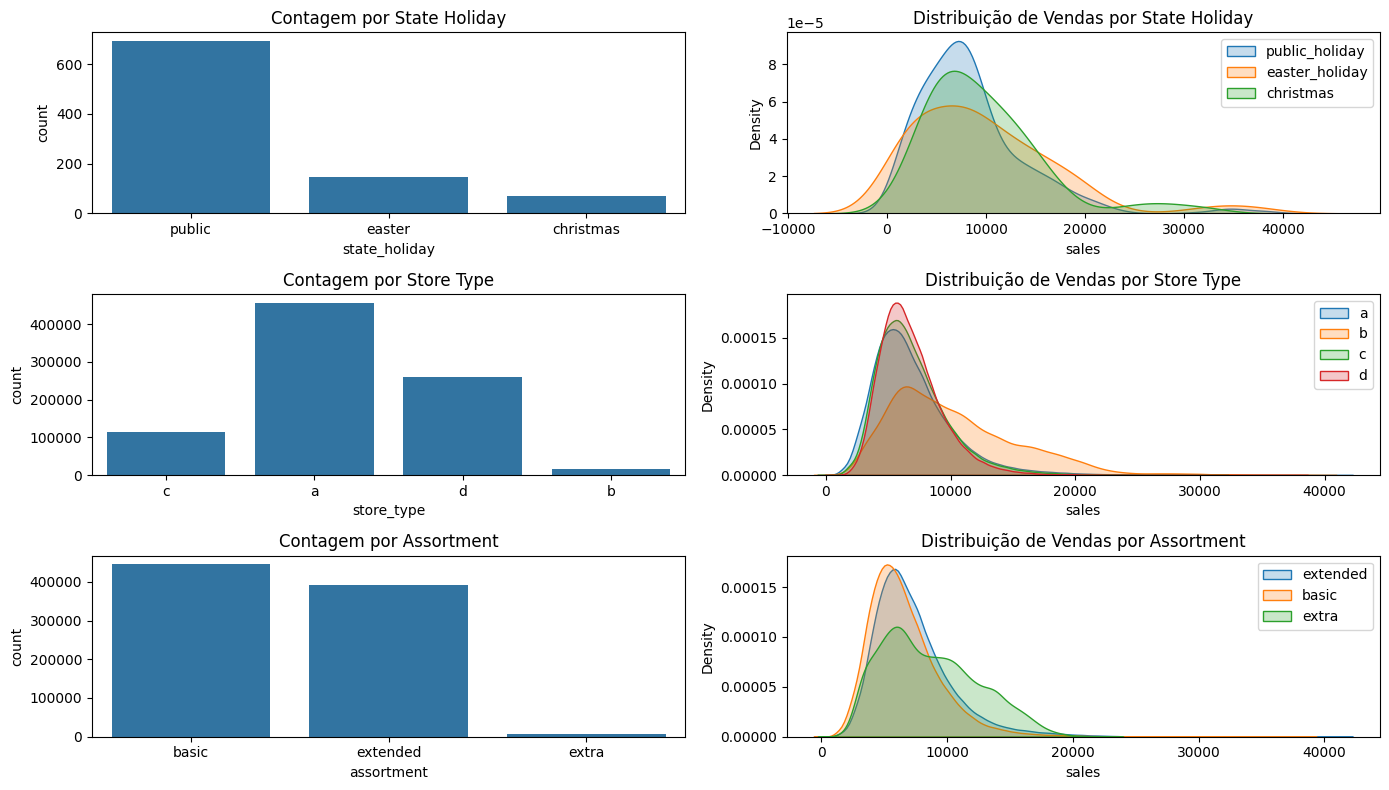

In [37]:
plt.figure(figsize=(14, 8))

# state_holiday
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x='state_holiday', data=a)
plt.title('Contagem por State Holiday')

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public']['sales'], label='public_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter']['sales'], label='easter_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)
plt.legend()
plt.title('Distribuição de Vendas por State Holiday')

# store_type
plt.subplot(3, 2, 3)
sns.countplot(x='store_type', data=df4)
plt.title('Contagem por Store Type')

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)
plt.legend()
plt.title('Distribuição de Vendas por Store Type')

# assortment
plt.subplot(3, 2, 5)
sns.countplot(x='assortment', data=df4)
plt.title('Contagem por Assortment')

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True)
plt.legend()
plt.title('Distribuição de Vendas por Assortment')

plt.tight_layout()
plt.show()

In [39]:
df5 = df4.copy()

## Análise Bivariada

Como a variável impacta na resposta?

### **H1.** Loja com maior sortimento deveriam vender mais

**FALSA** Lojas com maior sortimento vendem MENOS.

Text(0.5, 1.0, 'Vendas por Assortment')

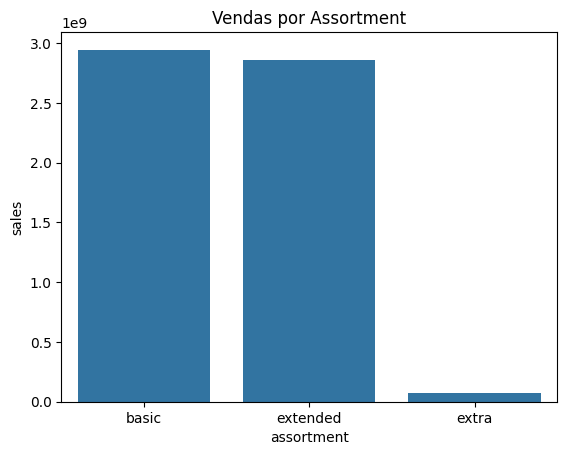

In [40]:
# H1. Loja com maior sortimento deveriam vender mais

aux1 = df5[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1)
plt.title('Vendas por Assortment')

# Resposta H1: Ter maior sortimento não necessariamente significa vender mais, pois o assortment 'extra' tem 
# vendas menores que 'basic' e 'extended', apesar de ser o mais completo.

In [41]:
aux2 = df5[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()


In [42]:
aux2.head(6)

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693
5,2013-01,extra,350279


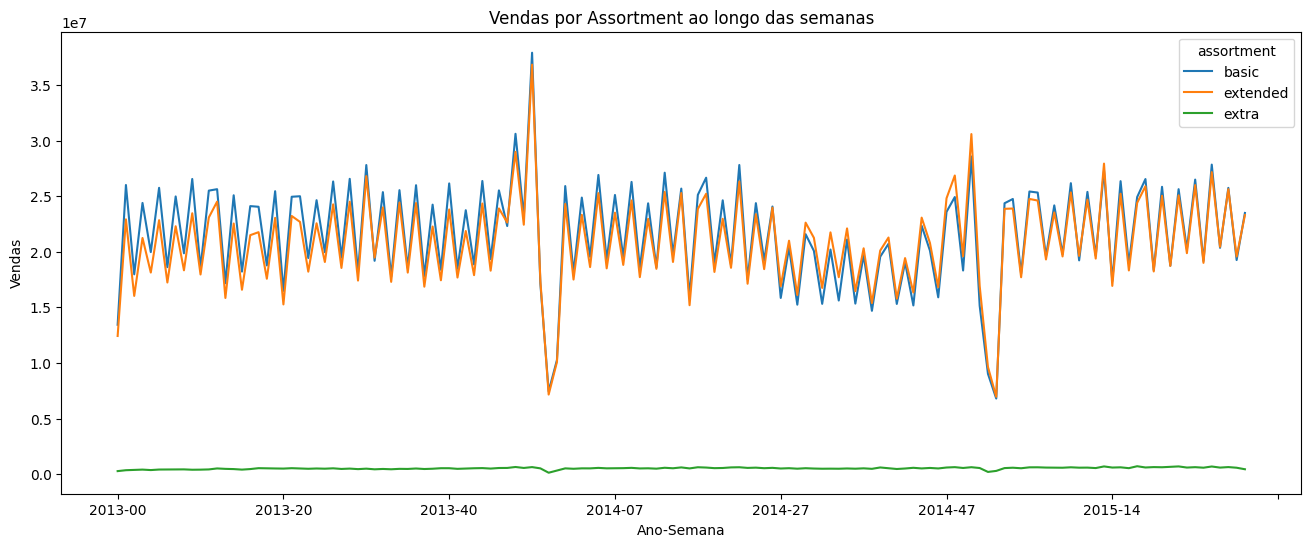

In [43]:
aux3 = aux2.pivot(index='year_week', columns='assortment', values='sales')
aux3.plot(kind='line', figsize=(16, 6))
plt.title('Vendas por Assortment ao longo das semanas')
plt.ylabel('Vendas')
plt.xlabel('Ano-Semana')
plt.show()

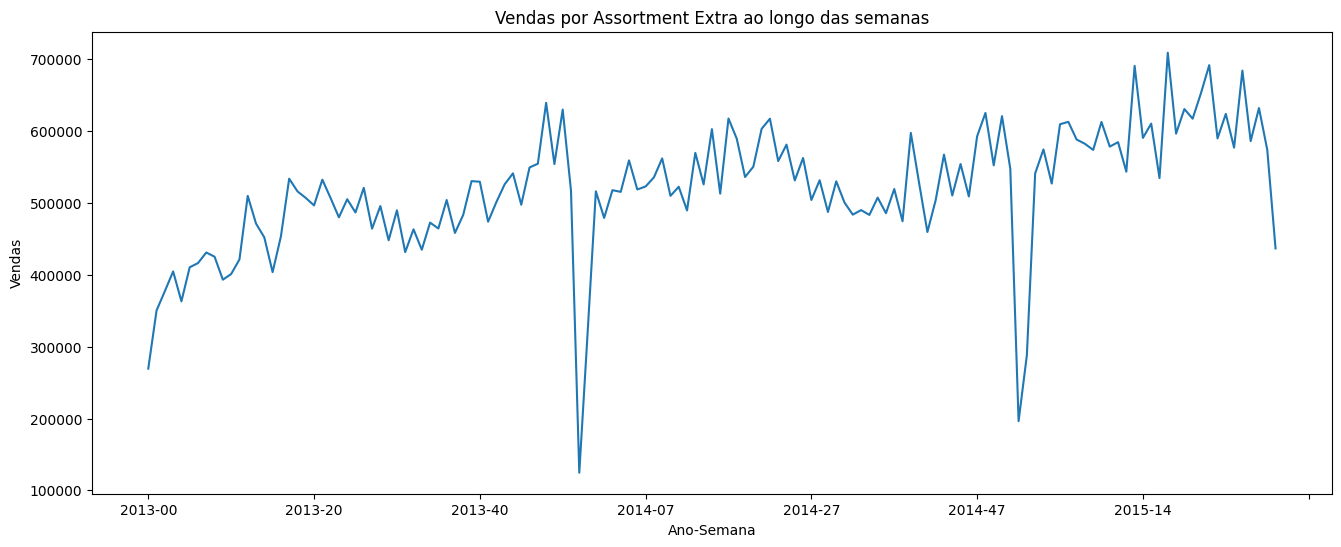

In [44]:
# Seleciona apenas a coluna 'extra' do DataFrame pivotado aux3
aux4 = aux3['extra']
aux4.plot(kind='line', figsize=(16, 6))
plt.title('Vendas por Assortment Extra ao longo das semanas')
plt.ylabel('Vendas')
plt.xlabel('Ano-Semana')
plt.show()

### **H2.** Loja com competidores mais proximos deveriam vender menos

**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

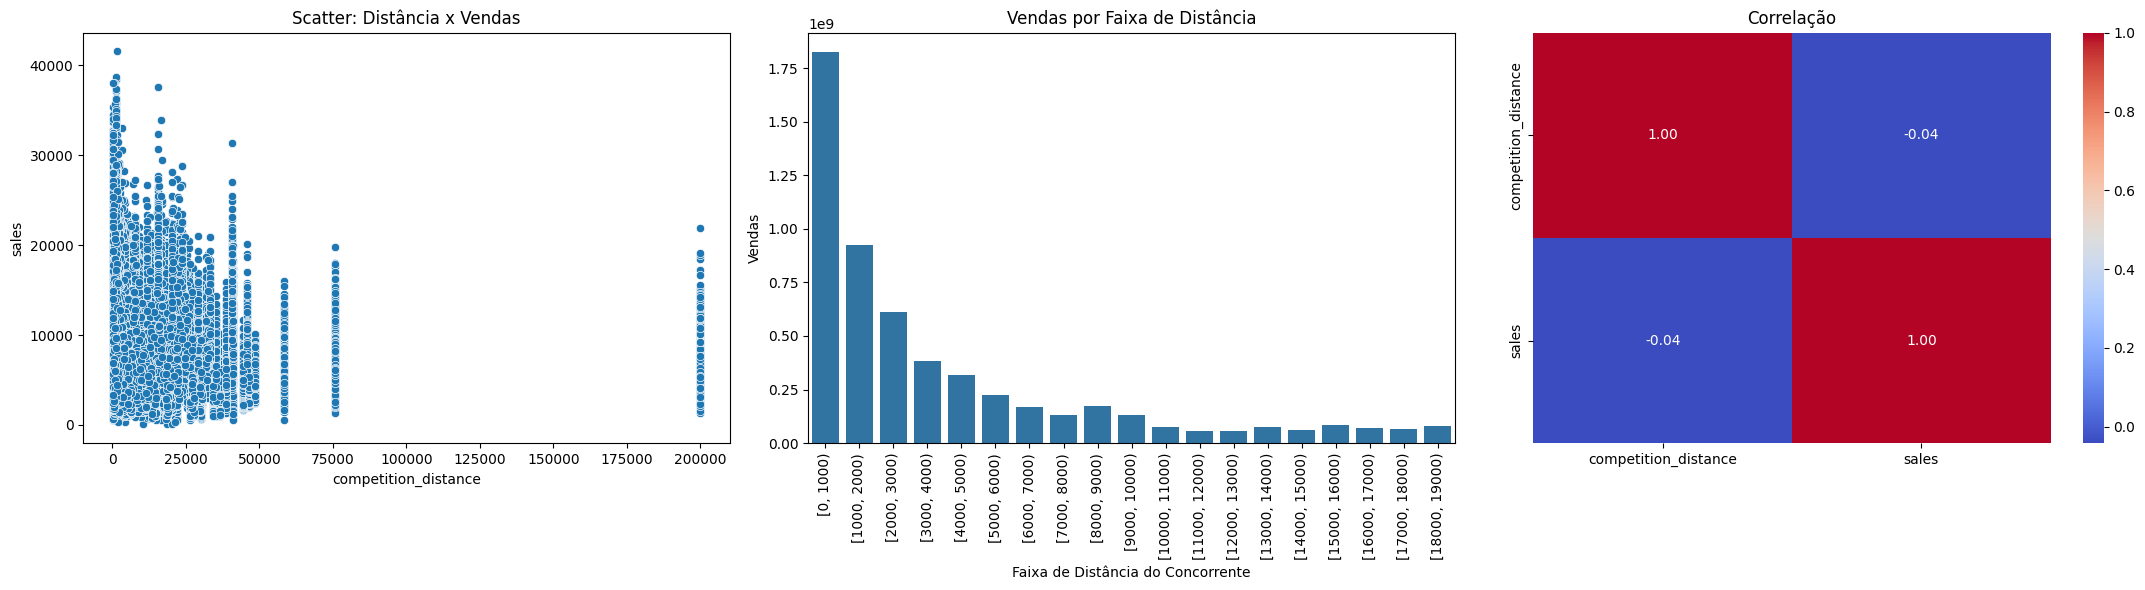

In [45]:
# Cria faixas (bins) para competition_distance
bins = list(np.arange(0, 20000, 1000))#[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 200000]
'''labels = [
	'0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k',
	'60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-200k'
]  labels=labels,'''
df5['competition_distance_binned'] = pd.cut(df5['competition_distance'], bins=bins, include_lowest=True, right=False)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Scatterplot
sns.scatterplot(x='competition_distance', y='sales', data=df5, ax=axes[0])
axes[0].set_title('Scatter: Distância x Vendas')

# 2. Barplot (binned)
# Agrupar vendas por faixa de distância
aux2 = df5.groupby('competition_distance_binned')['sales'].sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2, ax=axes[1])
axes[1].set_title('Vendas por Faixa de Distância')
axes[1].set_xlabel('Faixa de Distância do Concorrente')
axes[1].set_ylabel('Vendas')
axes[1].tick_params(axis='x', rotation=90)

# 3. Heatmap de correlação
sns.heatmap(df5[['competition_distance', 'sales']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Correlação')

plt.tight_layout()
plt.show()


### **H3.** Loja com competidores a mais tempo deveriam vender mais

**FALSO** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS.

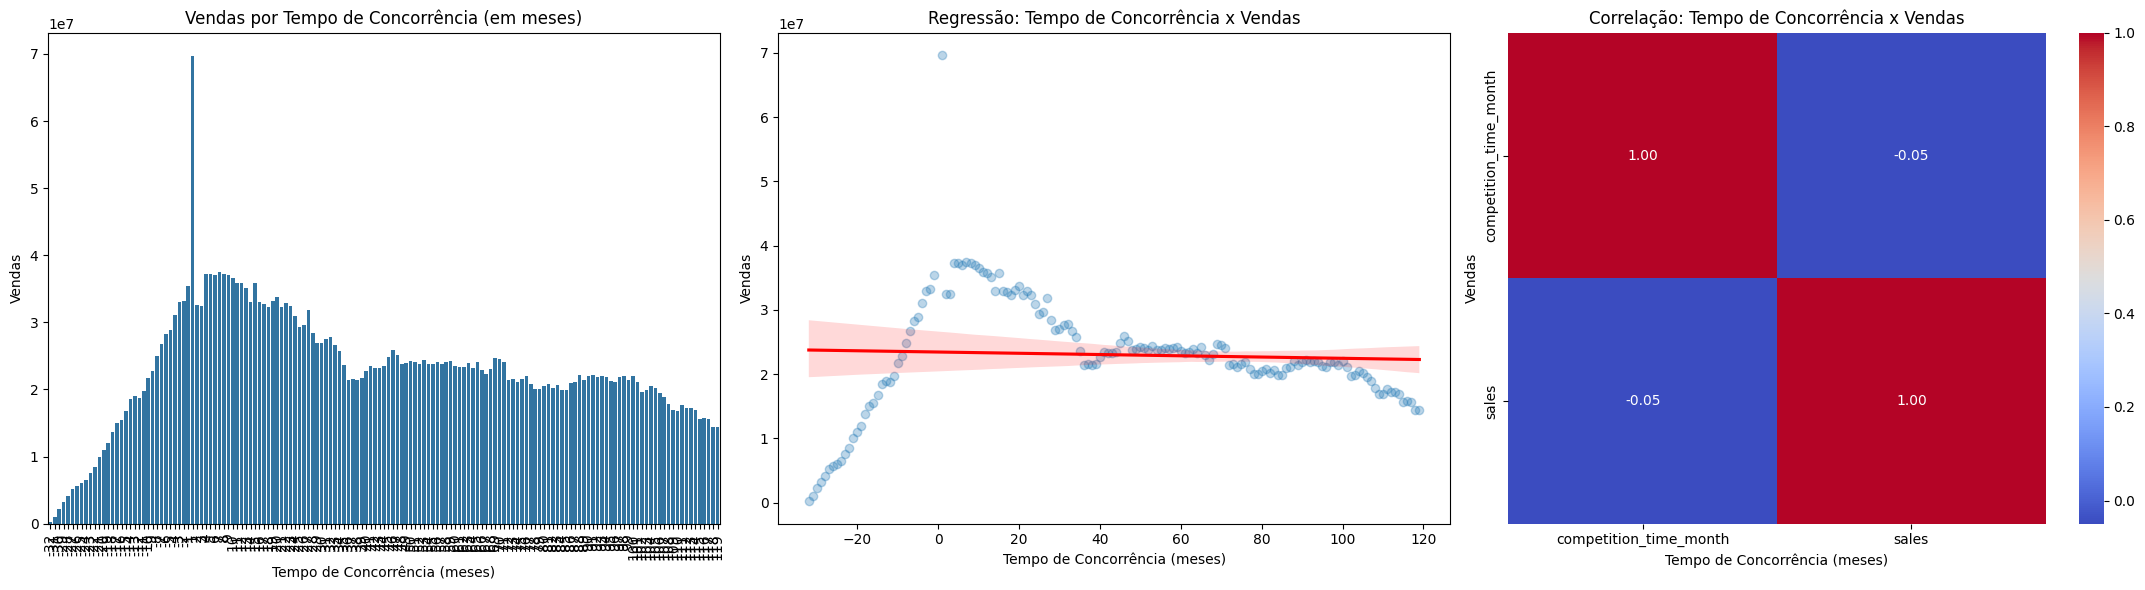

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Barplot: Vendas por Tempo de Concorrência (em meses)
aux1 = df5[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2, ax=axes[0])
axes[0].set_title('Vendas por Tempo de Concorrência (em meses)')
axes[0].set_xlabel('Tempo de Concorrência (meses)')
axes[0].set_ylabel('Vendas')
axes[0].tick_params(axis='x', rotation=90)

# 2. Regressão: Relação entre Tempo de Concorrência e Vendas
sns.regplot(x='competition_time_month', y='sales', data=aux2, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('Regressão: Tempo de Concorrência x Vendas')
axes[1].set_xlabel('Tempo de Concorrência (meses)')
axes[1].set_ylabel('Vendas')

# 3. Espaço reservado para outro gráfico
sns.heatmap(aux2.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Correlação: Tempo de Concorrência x Vendas')
axes[2].set_xlabel('Tempo de Concorrência (meses)')
axes[2].set_ylabel('Vendas')
axes[2].tick_params(axis='x')


plt.tight_layout()
plt.show()

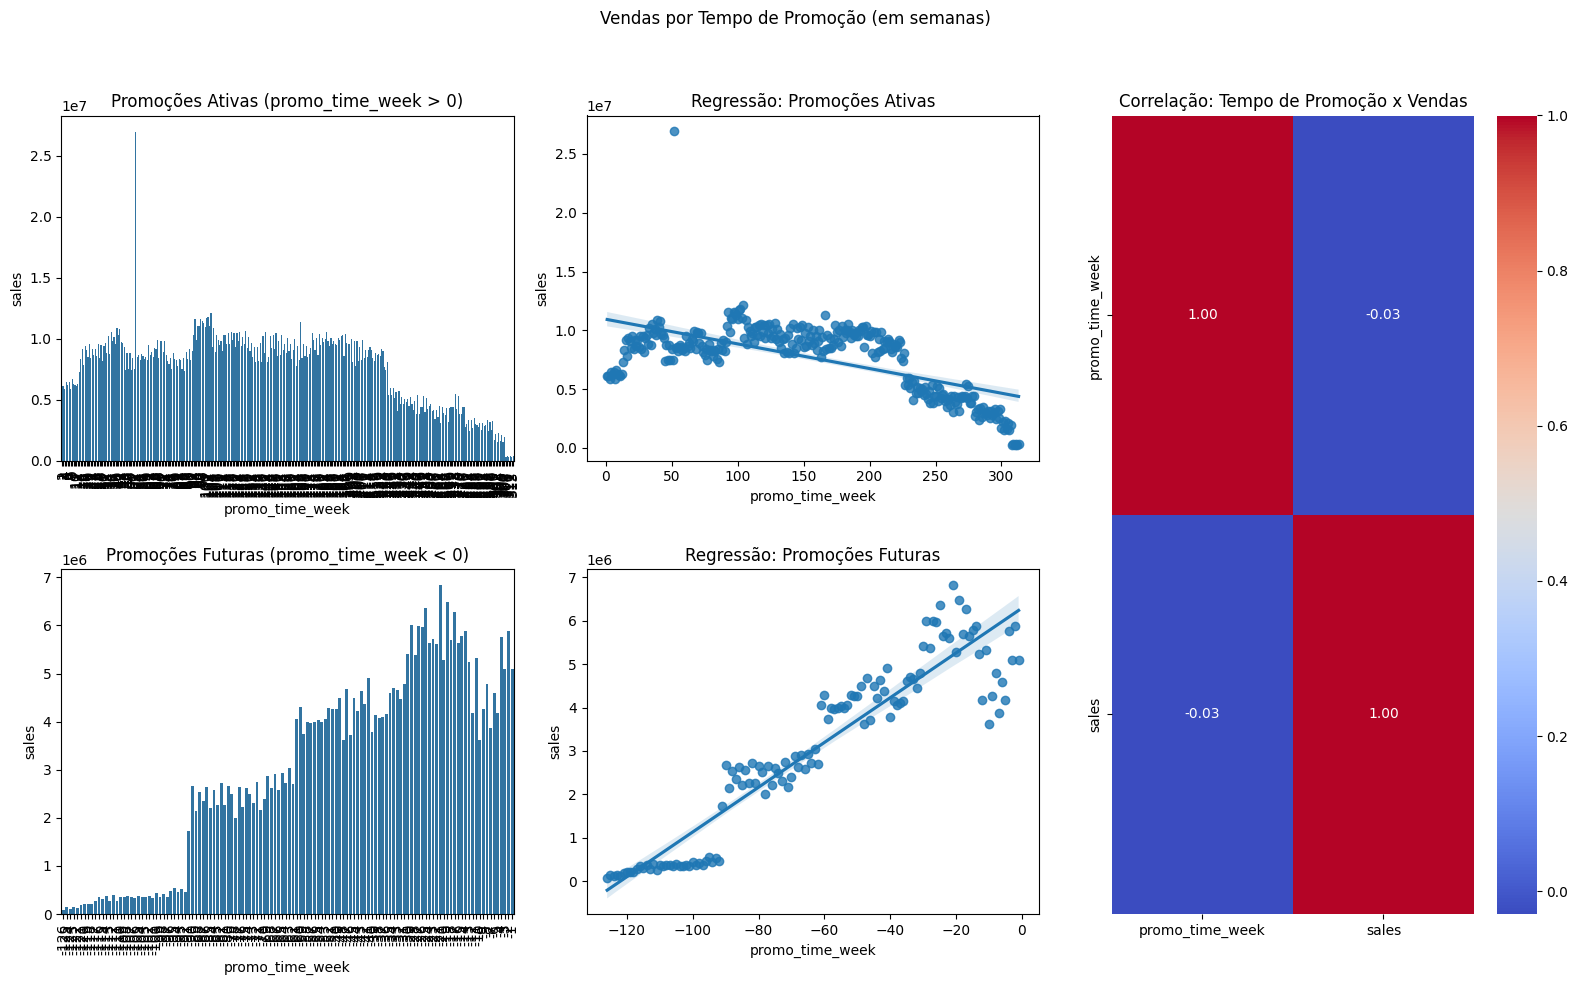

In [47]:
aux1 = df5[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

plt.figure(figsize=(16, 10))
plt.suptitle('Vendas por Tempo de Promoção (em semanas)')

grid = GridSpec(figure=(16, 10), nrows=2, ncols=3)

plt.subplot(grid[0, 0])
aux2 = aux1[aux1['promo_time_week'] > 0]
sns.barplot(x='promo_time_week', y='sales', data=aux2)
plt.title('Promoções Ativas (promo_time_week > 0)')
plt.xticks(rotation=90)

plt.subplot(grid[0, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux2)
plt.title('Regressão: Promoções Ativas')

plt.subplot(grid[1, 0])
aux3 = aux1[aux1['promo_time_week'] < 0]
sns.barplot(x='promo_time_week', y='sales', data=aux3)
plt.title('Promoções Futuras (promo_time_week < 0)')
plt.xticks(rotation=90)

plt.subplot(grid[1, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux3)
plt.title('Regressão: Promoções Futuras')

plt.subplot(grid[:, 2])
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação: Tempo de Promoção x Vendas')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### <s>**H5.** Loja com mais dias de promoção deveriam vender mais </s>


### **H6.** Loja com mais promoções consecutivas deveriam vender mais

**Falso** Lojas com mais promoções consecutivas VENDEM MENOS.

In [48]:
df5[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


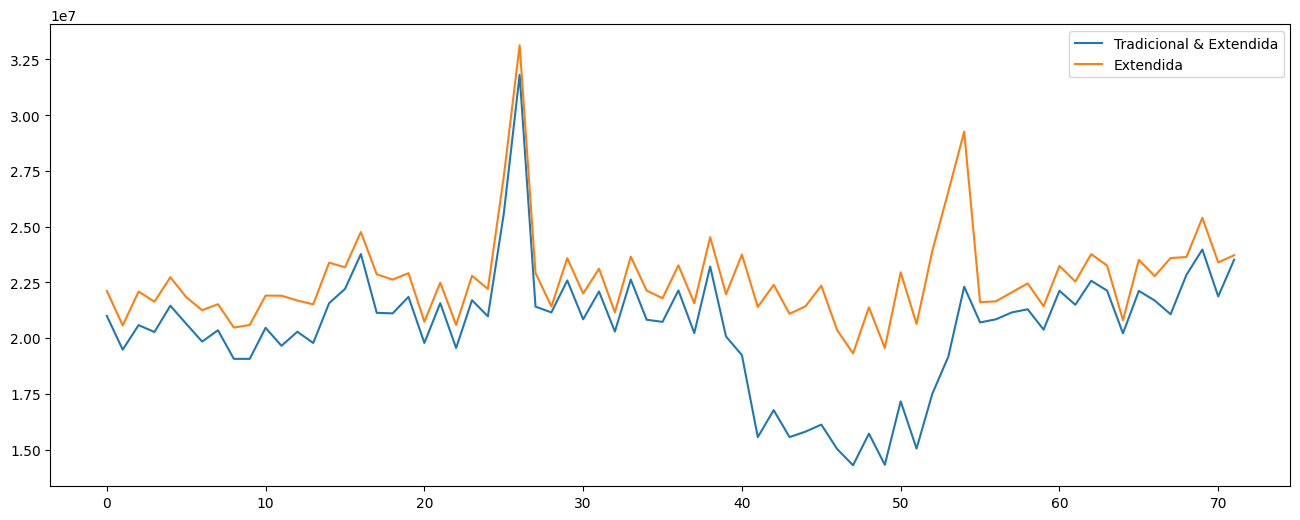

In [49]:
aux1 = df5[(df5['promo'] == 1) & (df5['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot(kind='line', figsize=(16, 6))

aux2 = df5[(df5['promo'] == 1) & (df5['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(kind='line', figsize=(16, 6), ax=ax)

ax.legend( labels=['Tradicional & Extendida', 'Extendida']);

Como as variáveis se relacionam?

### **H7.** Loja abertas durante o feriado de Natal deveriam vender mais

**Falso** Lojas abertas durante o feriado de natal vendem menos

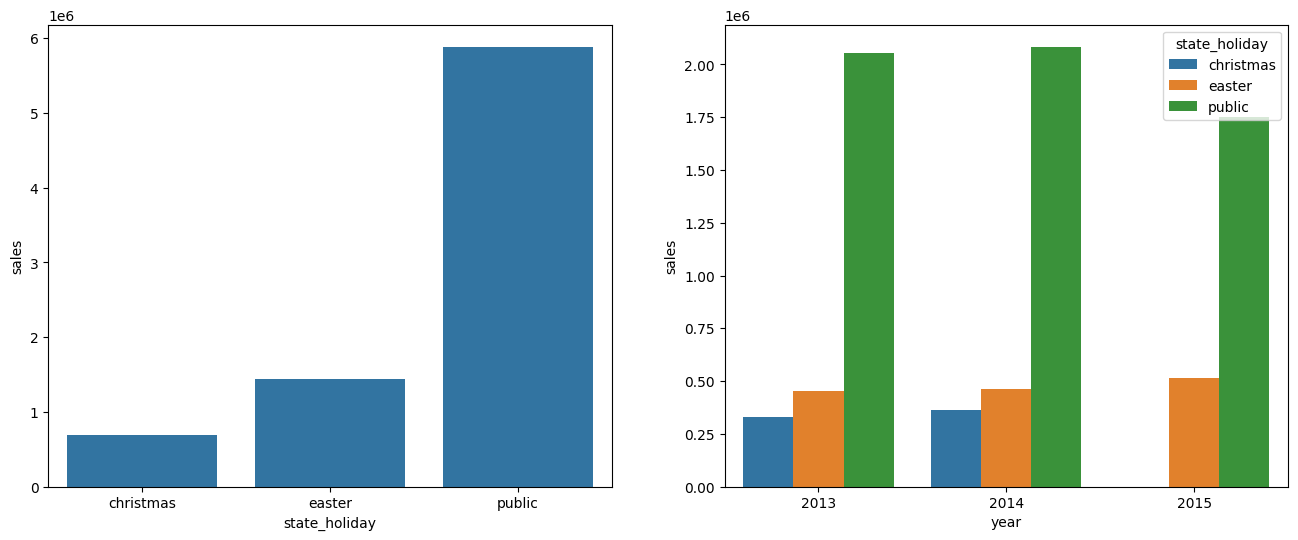

In [50]:
aux = df5[df5['state_holiday'] != 'regular_day'] # Retirando os dias normais para melhor visualização

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 2, 2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2);

### **H8.** Loja deveriam vender mais ao longo dos anos

**Falso** Lojas vendem MENOS ao longo dos anos

<Axes: >

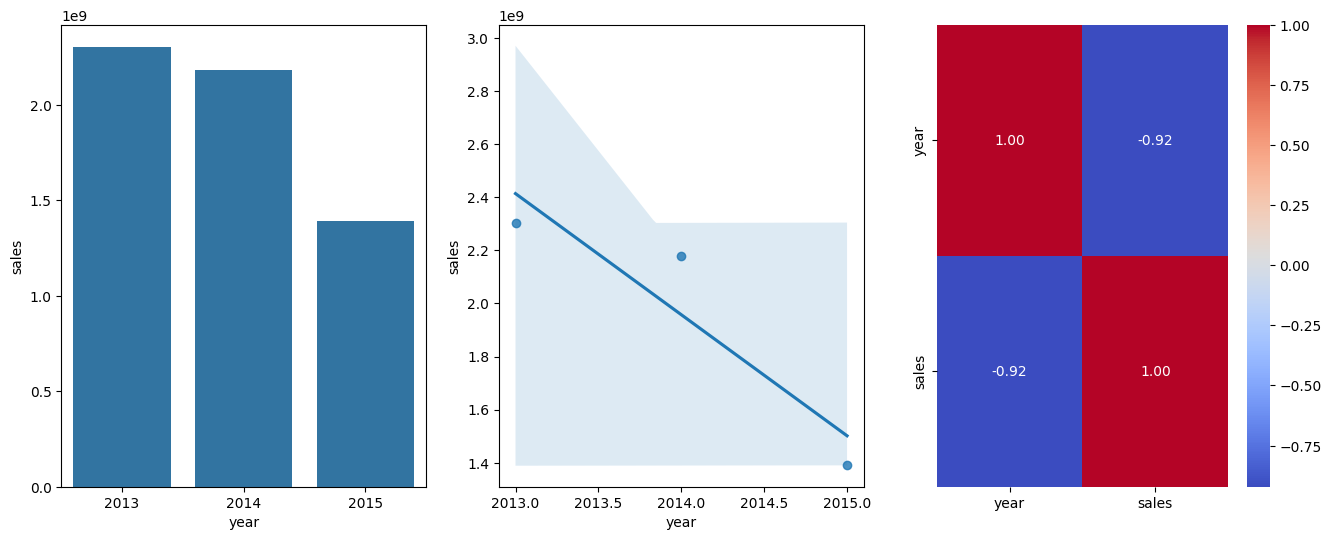

In [51]:
aux1 = df5[['year', 'sales']].groupby('year').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H9.** Loja deveriam vender mais no segundo semestre do ano

**FALSO** Lojas vendem MENOS no segundo semestre do ano

<Axes: >

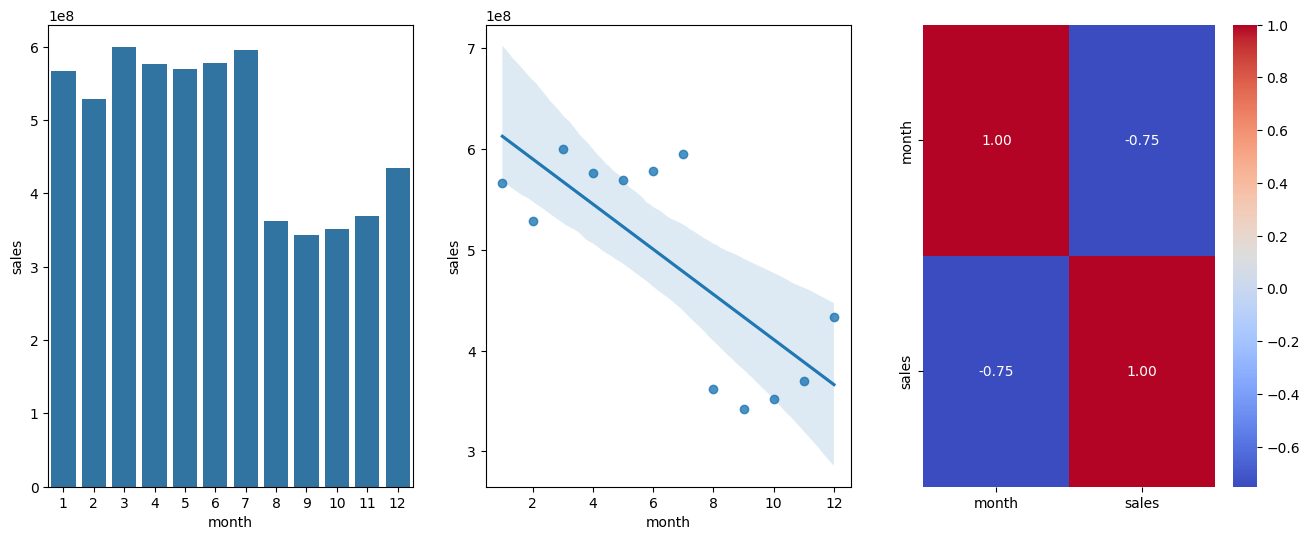

In [52]:
aux1 = df5[['month', 'sales']].groupby('month').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H10.** Loja deveriam vender mais depois do dia 10 de cada mês

**Verdadeira** Lojas vendem mais depois do dia 10 de cada mês 

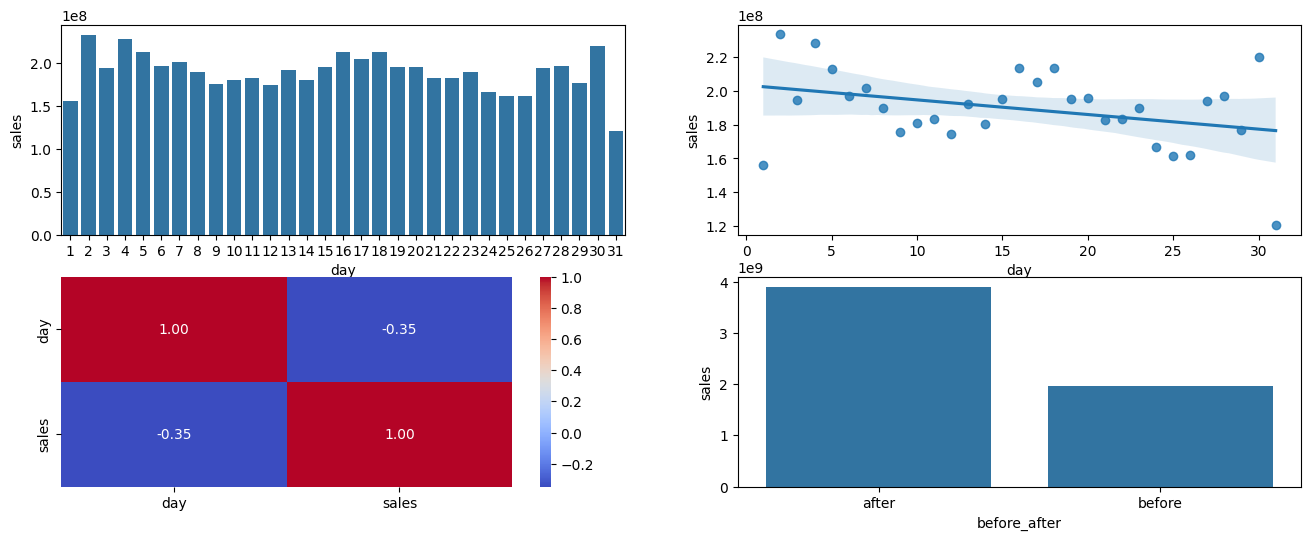

In [53]:
aux1 = df5[['day', 'sales']].groupby('day').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 2)
sns.regplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

plt.subplot(2, 2, 4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before' if x <= 10 else 'after')
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after', y='sales', data=aux2);

### **H11.** Loja deveriam vender menos aos finais de semana

**Verdadeiro** Lojas vendem MENOS nos finais de semana

<Axes: >

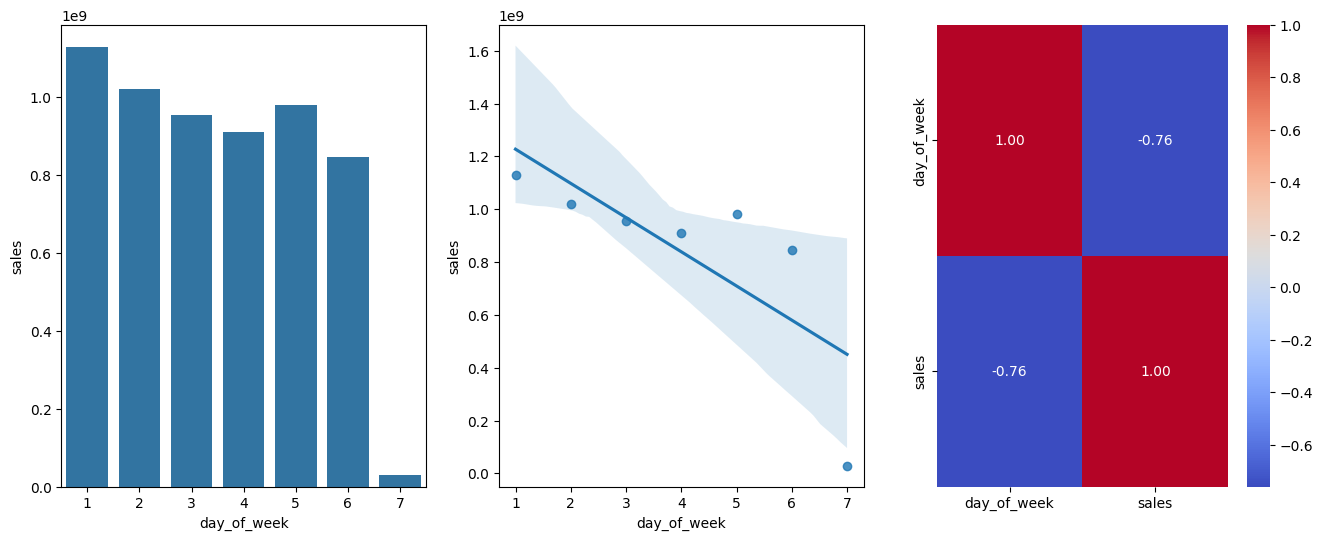

In [54]:
aux1 = df5[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### **H12.** Loja deveriam vender menos durante os feriados escolares

**Verdadeira** Lojas vendem menos durante os feriados escolares, exceto nos meses de julho e agosto.

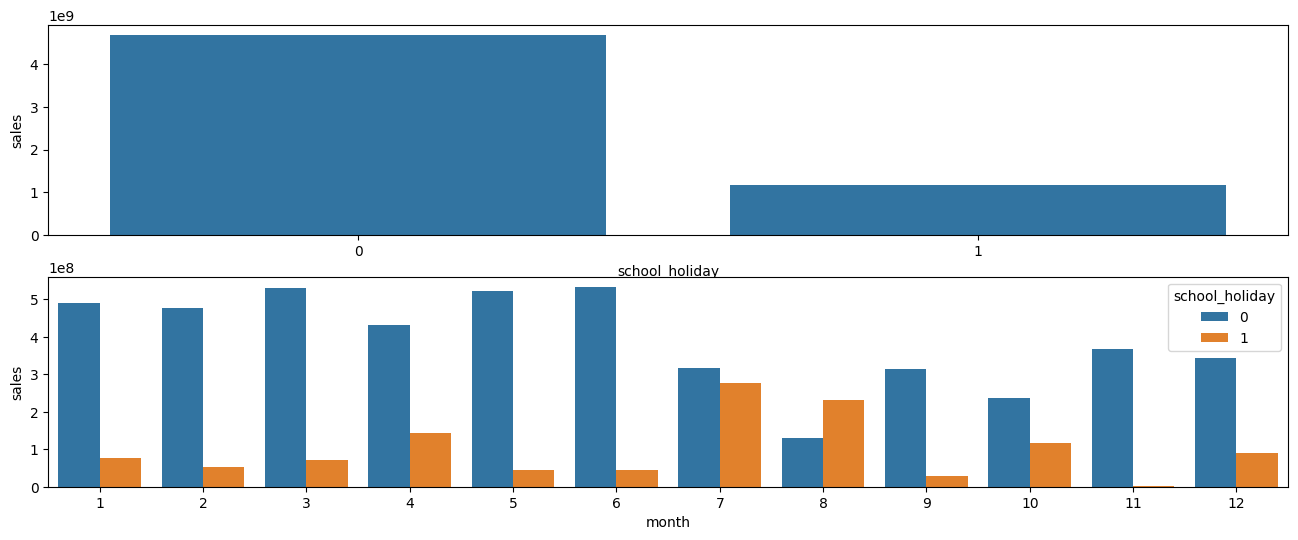

In [55]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 1)
aux1 = df5[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x='school_holiday', y='sales', data=aux1)

plt.subplot(2, 1, 2)
aux2 = df5[['month', 'school_holiday', 'sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux2);

# plt.subplot(1, 3, 3)
# sns.heatmap(aux1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')

### 4.2.1. Resumo das Hipoteses

In [56]:
tab = [['Hipoteses', 'Conclusão', 'Relevância'],
         ['H1', 'Falsa', 'Baixa'],
         ['H2', 'Falsa', 'Media'],
         ['H3', 'Falsa', 'Media'],
         ['H4', 'Falsa', 'Baixa'],
         ['H5', '--', '--'],
         ['H6', 'Falsa', 'Baixa'],
         ['H7', 'Falsa', 'Media'],
         ['H8', 'Falsa', 'Alta'],
         ['H9', 'Falsa', 'Alta'],
         ['H10', 'Falsa', 'Alta'],
         ['H11', 'Falsa', 'Alta'],
         ['H12', 'Falsa', 'Baixa']]

print(tabulate(tab, headers='firstrow', tablefmt='grid', stralign='center', numalign='center'))

+-------------+-------------+--------------+
|  Hipoteses  |  Conclusão  |  Relevância  |
+=============+=============+==============+
|     H1      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H2      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H3      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H4      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H5      |     --      |      --      |
+-------------+-------------+--------------+
|     H6      |    Falsa    |    Baixa     |
+-------------+-------------+--------------+
|     H7      |    Falsa    |    Media     |
+-------------+-------------+--------------+
|     H8      |    Falsa    |     Alta     |
+-------------+-------------+--------------+
|     H9      |    Falsa    |     Alta     |
+-------------+-------------+--------------+
|     H10     |    Falsa    |     Alta     |
+---------

## 4.3. Análise Multivariada

### 4.3.1. Numerical Attribuites

<Axes: >

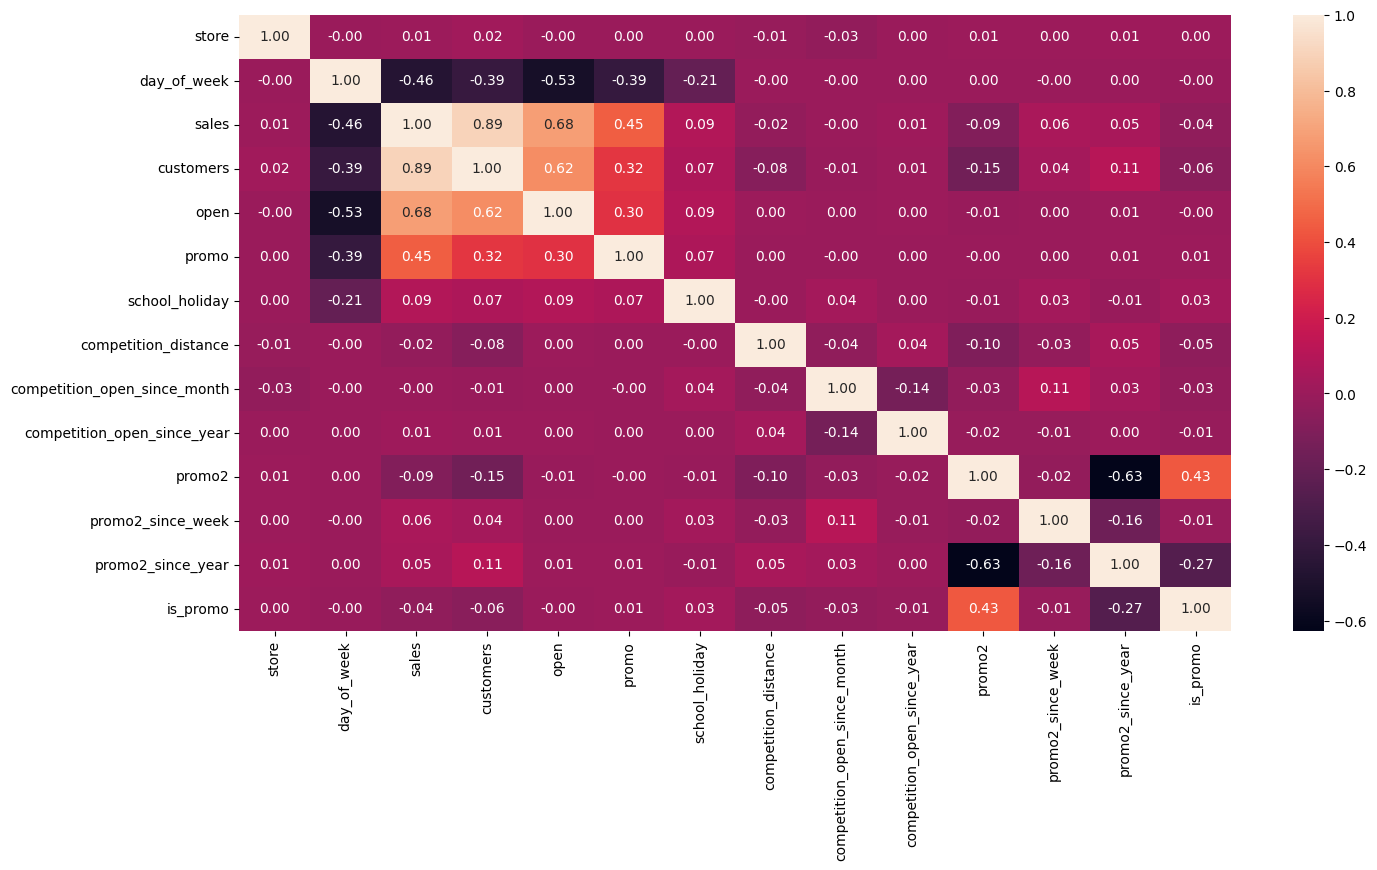

In [57]:
correlation = num_attributes.corr(method='pearson')
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')

### 4.3.1. Categorical Attributes

Text(0.5, 1.0, "Cramer's V Correlation Matrix")

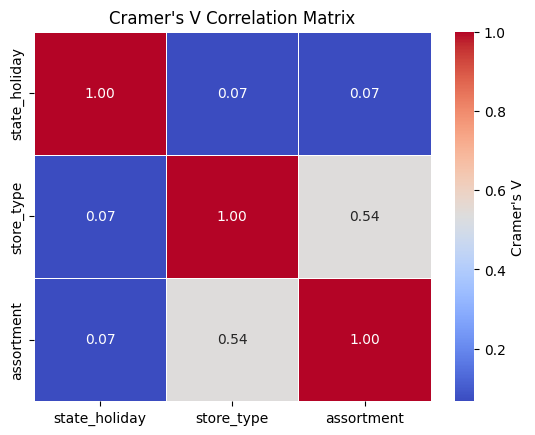

In [58]:
# only categorical attributes
a = df5.select_dtypes(include='object')

a1 = v_crameer(a['state_holiday'], a['state_holiday'])
a2 = v_crameer(a['state_holiday'], a['store_type'])
a3 = v_crameer(a['state_holiday'], a['assortment'])

a4 = v_crameer(a['store_type'], a['state_holiday'])
a5 = v_crameer(a['store_type'], a['store_type'])
a6 = v_crameer(a['store_type'], a['assortment'])

a7 = v_crameer(a['assortment'], a['state_holiday'])
a8 = v_crameer(a['assortment'], a['store_type'])
a9 = v_crameer(a['assortment'], a['assortment'])

d = pd.DataFrame({
    'state_holiday': [a1, a2, a3],
    'store_type': [a4, a5, a6],
    'assortment': [a7, a8, a9]
})

d = d.set_index(d.columns)

sns.heatmap(d, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Cramer\'s V'}, linewidths=.5)
plt.title('Cramer\'s V Correlation Matrix')

In [ ]:
# # only categorical data
# a = df4.select_dtypes( include='object' )

# # Calculate cramer V
# a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
# a2 = cramer_v( a['state_holiday'], a['store_type'] )
# a3 = cramer_v( a['state_holiday'], a['assortment'] )

# a4 = cramer_v( a['store_type'], a['state_holiday'] )
# a5 = cramer_v( a['store_type'], a['store_type'] )
# a6 = cramer_v( a['store_type'], a['assortment'] )

# a7 = cramer_v( a['assortment'], a['state_holiday'] )
# a8 = cramer_v( a['assortment'], a['store_type'] )
# a9 = cramer_v( a['assortment'], a['assortment'] )

# # Final dataset
# d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
#                'store_type': [a4, a5, a6],
#                'assortment': [a7, a8, a9]  })
# d = d.set_index( d.columns )

# sns.heatmap( d, annot=True , fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Cramer\'s V'}, linewidths=.5 )
# plt.title( 'Cramer\'s V Correlation Matrix' )

# 5.0: Preparação e modelagem dos dados

* Motivação: O aprendizado da maioria dos algoritmos de ML é facilitado com dados numéricos, na mesma escala.

1. Categóricas para numéricas (Enconding)

2. Redistribuição dos dados (padronizar ou normalizar)

In [59]:
df6 = df5.copy()

## 5.1. Normalização

## 5.2. Rescaling

In [ ]:
a = df5.select_dtypes(include=['int64', 'float64'])

In [ ]:
sns.boxplot(df5['promo_time_week'])

In [61]:
rs = RobustScaler()
mms = MinMaxScaler()

# competition distance
df5['competition_distance'] = rs.fit_transform(df6[['competition_distance']].values)
pickle.dump( rs, open( 'parameter/competition_distance_scaler.pkl', 'wb') )


# competition time month
df5['competition_time_month'] = rs.fit_transform(df6[['competition_time_month']].values)
pickle.dump( rs, open( 'parameter/competition_time_month_scaler.pkl', 'wb') )


# promo time week
df5['promo_time_week'] = mms.fit_transform(df6[['promo_time_week']].values)
pickle.dump( rs, open( 'parameter/promo_time_week_scaler.pkl', 'wb') )


# year
df5['year'] = mms.fit_transform(df6[['year']].values)
pickle.dump( mms, open( 'parameter/year_scaler.pkl', 'wb') )

## 5.3. Transformação

### 5.3.1 Enconding

In [62]:
# state_holiday - One hot encondig
df5 = pd.get_dummies(df5, columns=['state_holiday'], prefix='state_holiday')

# store_type - Label Encoding
le = LabelEncoder()
df5['store_type'] = le.fit_transform(df5['store_type'])
pickle.dump( le, open( 'parameter/store_type_scaler.pkl', 'wb') )

# assortment - Ordinal Encoding
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df5['assortment'] = df5['assortment'].map(assortment_dict)

### 5.3.2. Response Variable Transformation

In [63]:
df5['sales'] = np.log1p(df5['sales'])

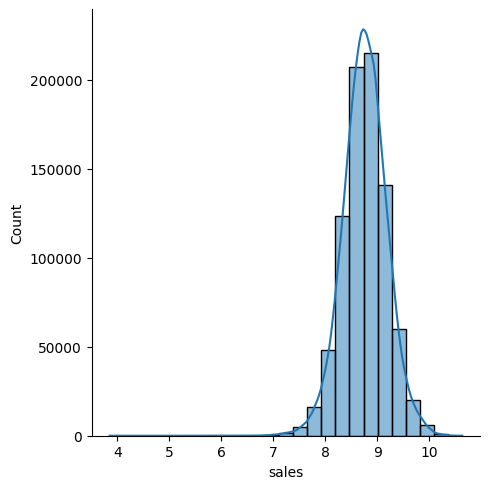

In [64]:
sns.displot(df5['sales'], bins=25, kde=True)

### 5.3.2. Nature Transformation

In [65]:
# day of week 
df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x * (2 * np.pi / 7)))
df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x * (2 * np.pi / 7)))

# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x * (2 * np.pi / 52)))
df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x * (2 * np.pi / 52)))

# month
df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x * (2 * np.pi / 12)))
df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x * (2 * np.pi / 12)))

# day
df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x * (2 * np.pi / 30)))
df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x * (2 * np.pi / 30)))


# 6.0: Seleção de variáveis (Feature Selection)

"A explicações mais simples sobre um fenômeno observado, deve sobresair explicações mais complexas"

Prefira modelos mais simples!!!

In [66]:
df6 = df5.copy()

### 6.1. Split dataframe into training and test dataset

In [67]:
cols_drop = ['week_of_year', 'day', 'month', 'day_of_week', 'competition_since', 'promo_since', 'year_week']
df6 = df6.drop(cols_drop, axis=1)

In [ ]:
# Filtrando apenas as últimas 6 semanas de dados
# df6[['store', 'date']].groupby('store').max().reset_index()['date'][0] - datetime.timedelta(days=6*7)

Não podemos pegar dados futuros e passados juntos aleatóriamente. Então pegaremos as últimas 6 semanas para treino e o restante para teste.

In [68]:
# Treinando dataset
X_train = df6[df6['date'] < '2015-06-19']
y_train = X_train['sales']

# Testando dataset
X_test = df6[df6['date'] >= '2015-06-19']
y_test = X_test['sales']

In [69]:
print('Training Min Date: {}'.format(X_train['date'].min()))
print('Training Max Date: {}'.format(X_train['date'].max()))
print('\nTesting Min Date: {}'.format(X_test['date'].min()))
print('Testing Max Date: {}'.format(X_test['date'].max()))


Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Testing Min Date: 2015-06-19 00:00:00
Testing Max Date: 2015-07-31 00:00:00


### 6.2. Boruta as Feature Selector

In [ ]:
# # Training and testing datasets for boruta
# X_train_n = X_train.drop(['date', 'sales', 'competition_distance_binned'], axis=1).values
# y_train_n = y_train.values.ravel()

# # define RandomForestRegressor
# rf = RandomForestRegressor(n_jobs=-1)

# # define Boruta
# boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_train_n, y_train_n)

## O modelo já foi executado (tempo total: 83 minutos)
## As variáveis necessárias foram calculadas com sucesso

### 6.2.1. Best Features from Boruta 

In [ ]:
# cols_selected = boruta.support_.tolist()

# # best features
# X_train_fs = X_train.drop(['date', 'sales', 'competition_distance_binned'], axis=1)
# cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.tolist()

# # Visualize the selected features
# cols_not_select_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta))

In [ ]:
# cols_selected_boruta

In [ ]:
# cols_not_select_boruta

### 6.3. Manual Feature Selection

In [70]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'competition_time_month',
    'promo_time_week',
    'day_of_week_sin',
    'day_of_week_cos',
    'week_of_year_cos',
    'week_of_year_sin',
    'month_cos',
    'month_sin',
    'day_sin',
    'day_cos']

# Colunas a serem adicionadas
features_to_add = ['date', 'sales']

# Features selecionadas + features a serem adicionadas
#cols_selected_boruta.extend(features_to_add)
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend(features_to_add)

In [71]:
cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'week_of_year_cos',
 'week_of_year_sin',
 'month_cos',
 'month_sin',
 'day_sin',
 'day_cos']

In [72]:
cols_selected_boruta_full

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'competition_time_month',
 'promo_time_week',
 'day_of_week_sin',
 'day_of_week_cos',
 'week_of_year_cos',
 'week_of_year_sin',
 'month_cos',
 'month_sin',
 'day_sin',
 'day_cos',
 'date',
 'sales']

# 7.0. PASSO 07 - Machine Learning Modelling

In [74]:
x_train = X_train[cols_selected_boruta]
x_test = X_test[cols_selected_boruta]

# Preparação de dados de serie temporal
x_training = X_train[cols_selected_boruta_full]

## 7.1. Averange Model

In [75]:
aux1 = x_test.copy()
aux1['sales'] = y_test.copy()

# predictions
aux2 = aux1[['store', 'sales']].groupby('store').mean().reset_index().rename(columns={'sales': 'predictions'})
aux1 = pd.merge(aux1, aux2, on='store', how='left')
yhat_baseline = aux1['predictions']

# performance
baseline_results = ml_error('Average Model', np.expm1(y_test), np.expm1(yhat_baseline))
baseline_results

,model,mae,mape,rmse,r2
0,Average Model,1354.800353,0.2064,1835.135542,0.636551


## 7.2. Linear Regression Model

In [ ]:
# Modelo
lr = LinearRegression().fit(x_train, y_train)

# Predições
yhat_lr = lr.predict(x_test)

# Performance
lr_results = ml_error('Linear Regression', y_test, yhat_lr, inverse_log=True)
lr_results

### 7.2.1. Linear Regression Model - CV

In [ ]:
lr = LinearRegression()
cv_lr = cross_validation(x_train, y_train, 'Linear Regression', lr, kfold=5, inverse_log=True)
cv_lr

## 7.3. Linear Regression Regularized Model

In [ ]:
# Modelo
lrr = Lasso(alpha=0.01).fit(x_train, y_train)

# Predições
yhat_lrr = lrr.predict(x_test)

# Performance
lrr_results = ml_error('Lasso Regression', y_test, yhat_lrr, inverse_log=True)
lrr_results

### 7.3.1. Linear Regression Regularized Model - CV

In [ ]:
lrr = Lasso(alpha=0.01)
cv_lrr = cross_validation(x_train, y_train, 'Lasso Regression', lrr, kfold=5, inverse_log=True)
cv_lrr

## 7.4. Random Forest Regressor

In [ ]:
# Modelo
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    random_state=42
).fit(x_train, y_train)

# Predições
yhat_rf = rf.predict(x_test)

# Performance
rf_results = ml_error('Random Forest Regression', y_test, yhat_rf, inverse_log=True)
rf_results

### 7.4.1. Random Forest Regression Model - CV

In [ ]:
cv_rf = cross_validation(x_train, y_train, 'Random Forest Regression', rf, kfold=5, inverse_log=True)
cv_rf

## 7.5. XGBoost Regressor

In [ ]:
# Modelo
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    eta=0.01,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.9,   # corrigido typo
    random_state=42
).fit(x_train, y_train)

# Predições
yhat_xgb = xgb_model.predict(x_test)

# Performance
xgb_results = ml_error('XGBoost Regression', y_test, yhat_xgb, inverse_log=True)
xgb_results

### 7.5.1. Linear Regression Model - CV

In [ ]:
cv_xgb = cross_validation(x_train, y_train, 'XGBoost Regression', xgb_model, kfold=5, inverse_log=True)
cv_xgb

## 7.6. Compare Model's Performance

In [ ]:
modelling_results = pd.concat([baseline_results, lr_results, lrr_results, rf_results, xgb_results])
modelling_results.sort_values(by='rmse', ascending=True).reset_index(drop=True)

In [ ]:
cv_results = pd.concat([cv_lr, cv_lrr, cv_rf, cv_xgb])
cv_results.sort_values(by='rmse', ascending=True).reset_index(drop=True)

🔹 1. Avaliação do modelo isolado

Aqui você olha apenas para a previsão do conjunto de teste (aquele x_test, y_test separado no começo).

É útil para ver como o modelo se comporta em um cenário real, mas pode estar sujeito ao acaso dependendo de como o train_test_split foi feito.

🔹 2. Avaliação com Cross Validation

O cross validation dá uma visão mais robusta porque roda várias vezes (ex.: 5 folds) e retorna a média dos erros.

Isso reduz o risco de dizer que um modelo é bom só porque “deu sorte” no train_test_split.

🔹 3. O que comparar

Para definir o melhor modelo, você olha para as métricas de erro (do CV, principalmente):

MAE (Mean Absolute Error) → erro médio em valores absolutos.
👉 Interpretação: “em média, meu modelo erra X unidades”.

MAPE (Mean Absolute Percentage Error) → erro médio em porcentagem.
👉 Interpretação: “em média, meu modelo erra X% do valor real”.
⚠️ Problema: não é confiável quando existem valores próximos de 0.

RMSE (Root Mean Squared Error) → penaliza mais erros grandes do que o MAE.
👉 Útil se você quer evitar erros muito altos em alguns casos.

R² (Coeficiente de Determinação) → mede a proporção da variabilidade explicada.
👉 Varia entre -∞ e 1. Quanto mais próximo de 1, melhor.

🔹 4. Critério prático

Olhe primeiro para RMSE ou MAE → para ver qual modelo tem o menor erro médio.

Confirme com R² → veja se o modelo realmente explica bem a variação dos dados.

Consistência → verifique se o desempenho no teste isolado é parecido com o do cross validation.

Se for muito diferente, pode ser que seu modelo esteja overfitting (memoriza o treino mas não generaliza).

🔹 5. Exemplo de decisão

Suponha que você rodou e obteve:

| Modelo            | MAE  | RMSE | R²   |
|-------------------|------|------|------|
| Linear Regression | 1200 | 1800 | 0.72 |
| Lasso Regression  | 1250 | 1850 | 0.71 |
| Random Forest     |  900 | 1500 | 0.85 |
| XGBoost           |  880 | 1480 | 0.86 |


📌 Conclusão:

XGBoost → melhor RMSE e melhor R² → provavelmente o melhor modelo.

Random Forest → também muito bom, pode ser uma escolha se você quiser interpretabilidade maior (feature importance, etc.).

Linear / Lasso → piores métricas → descartados (ou usados como baseline).

👉 Em resumo:
O melhor modelo é aquele que no cross validation mostra menor erro (MAE/RMSE) e maior R², sem discrepâncias absurdas entre treino, CV e teste.

# 8.0 Passo 08: Hyperparametro Fine Tunning

Encontrar o conjutno de parâmetros que maximiza o aprendizado do modelo

obs.: fine tunning não deve ser o principal "melhorador do modelo" e o passomais demorado (para melhorar o modelo, deve-se investir em features novas)

🔹 Random Search

Seleciona combinações aleatórias de hiperparâmetros dentro de um espaço definido.

✅ Vantagens

* Mais eficiente que Grid Search em espaços grandes.

* Pode encontrar boas soluções rapidamente sem testar todas as combinações.

* Permite controlar o número de iterações (mais flexível).

* Bom para explorar espaços de hiperparâmetros contínuos.

❌ Desvantagens

* Não garante encontrar a melhor combinação.

* Pode precisar de muitas iterações para cobrir bem o espaço.

* Resultados variam a cada execução (aleatoriedade).


🔹 Grid Search

Explora todas as combinações possíveis de hiperparâmetros em uma grade definida.

✅ Vantagens

* Simples de entender e implementar.

* Garante que todas as combinações na grade são testadas.

* Bom para espaços pequenos de hiperparâmetros.

❌ Desvantagens

* Escala muito mal quando há muitos hiperparâmetros (explosão combinatória).

* Pode desperdiçar tempo em regiões pouco promissoras.

* Rígido: se a grade não incluir a "boa faixa", você pode perder a melhor configuração.

🔹 Bayesian Search (ex: Bayesian Optimization, TPE, SMBO)

Constrói um modelo probabilístico da função objetivo e escolhe novas combinações com base no conhecimento adquirido.

✅ Vantagens

* Muito mais eficiente que Grid/Random para problemas complexos.

* Aprende com as iterações anteriores, buscando regiões promissoras.

* Frequentemente encontra hiperparâmetros melhores com menos tentativas.

* Ideal quando cada avaliação de modelo é custosa (ex: deep learning).

❌ Desvantagens

* Mais complexo de implementar e configurar.

* Pode ser computacionalmente pesado na otimização do modelo auxiliar.

* Em problemas muito simples, pode ser "overkill" comparado a Random Search.

📊 Resumo prático:

* **Random Search** → bom para espaços grandes quando você tem orçamento limitado.

* **Grid Search** → bom se o espaço é pequeno e você quer exaustividade.

* **Bayesian Search** → bom quando as avaliações são caras e você quer eficiência máxima.

## 8.1. Random Search

In [ ]:
param = {
    'n_estimators': [1500, 1700, 2500, 3000, 3500],
    'eta': [0.01, 0.03],
    'max_depth': [3, 5, 9],
    'subsample': [0.1, 0.5, 0.7],
    'colsample_bytree': [0.3, 0.7, 0.9],
    'min_child_weight': [3, 8, 15]
    }
MAX_EVAL = 10

In [ ]:
final_result = pd.DataFrame()
for i in range(MAX_EVAL):
    # Escolhendo valores para os parâmetros aleatoriamente
    hp = { k: random.sample(v,1)[0] for k, v in param.items() }
    print(hp)

    # Modelo
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=hp['n_estimators'],
        eta=hp['eta'],
        max_depth=hp['max_depth'],
        subsample=hp['subsample'],
        colsample_bytree=hp['colsample_bytree'],   # corrigido typo
        min_child_weight=hp['min_child_weight']
    )

    # Performance
    result = cross_validation(x_train, y_train, 'XGBoost Regression', xgb_model, kfold=5, inverse_log=True)
    final_result = pd.concat([final_result, result])

final_result

In [ ]:
final_result

## Parâmetros encontrados anteriormente (duração: 84 minutos)



| n_estimators | eta  | max_depth | subsample | colsample_bytree | min_child_weight |
|--------------|------|-----------|-----------|------------------|------------------|
| 2500         | 0.03 | 5         | 0.7       | 0.7              | 3                |
| 3500         | 0.01 | 5         | 0.5       | 0.9              | 8                |
| 1700         | 0.01 | 9         | 0.5       | 0.7              | 3                |
| 3000         | 0.03 | 9         | 0.5       | 0.7              | 8                |
| 1500         | 0.01 | 5         | 0.1       | 0.7              | 3                |
| 3500         | 0.01 | 5         | 0.1       | 0.7              | 8                |
| 3500         | 0.03 | 5         | 0.7       | 0.9              | 8                |
| 1700         | 0.03 | 5         | 0.5       | 0.9              | 8                |
| 3500         | 0.03 | 5         | 0.7       | 0.7              | 15               |
| 3500         | 0.03 | 3         | 0.5       | 0.9              | 3                |

**Resultados de avaliação – XGBoost Regression**

| model               | mae        | mape     | rmse        | r2       |
|---------------------|------------|----------|-------------|----------|
| XGBoost Regression  | 731.048822 | 0.111444 | 1066.631293 | 0.882125 |
| XGBoost Regression  | 949.320451 | 0.143500 | 1392.327026 | 0.799126 |
| XGBoost Regression  | 632.385941 | 0.095588 | 932.348914  | 0.909937 |
| XGBoost Regression  | 457.180197 | 0.069650 | 683.481551  | 0.951600 |
| XGBoost Regression  | 1311.329031| 0.198659 | 1916.192783 | 0.619579 |
| XGBoost Regression  | 961.266238 | 0.145452 | 1403.838400 | 0.795810 |
| XGBoost Regression  | 660.241706 | 0.100703 | 966.835664  | 0.903151 |
| XGBoost Regression  | 815.701892 | 0.123826 | 1191.195489 | 0.852987 |
| XGBoost Regression  | 666.251408 | 0.101792 | 974.281266  | 0.901657 |
| XGBoost Regression  | 1125.087786| 0.170755 | 1644.138424 | 0.719928 |


## 8.2. Final Model

In [76]:
param_tuned = {
    'n_estimators': 3000, 
    'eta': 0.03, 
    'max_depth': 9, 
    'subsample': 0.5, 
    'colsample_bytree': 0.7, 
    'min_child_weight': 8
    }

In [77]:
# Modelo
xgb_model_tuned = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=param_tuned['n_estimators'],
    eta=param_tuned['eta'],
    max_depth=param_tuned['max_depth'],
    subsample=param_tuned['subsample'],
    colsample_bytree=param_tuned['colsample_bytree'],   # corrigido typo
    min_child_weight=param_tuned['min_child_weight']
).fit(x_train, y_train)

# Predição
yhat_xgb_tuned = xgb_model_tuned.predict(x_test)

# Performance
xgb_results_tuned = cross_validation(
    x_train, 
    y_train, 
    'XGBoost Regression', 
    xgb_model_tuned, 
    kfold=5, 
    inverse_log=True
)

xgb_results_tuned

,model,mae,mape,rmse,r2
0,XGBoost Regression,457.180197,0.06965,683.481551,0.9516


**Resultados final tunado – XGBoost Regression**

| model               | mae        | mape     | rmse        | r2       |
|---------------------|------------|----------|-------------|----------|
| XGBoost Regression  | 457.180197 | 0.06965  | 683.481551  | 0.9516   |

Tempo de execução do modelos tunado: 15 minutos

* Como entender a performance do modelo e dizer ao HEAD o quanto (R$) esse modelo vai trazer para empresa?

# 9.0. Passo 9 - Tradução e interpretação do erro

In [78]:
df9 = X_test[cols_selected_boruta_full]

# Rescale
df9['sales'] = np.expm1(df9['sales'])
df9['predictions'] = np.expm1(yhat_xgb_tuned)

## 9.1. Business Performance

In [79]:
# Somando as predições por loja
df91 = df9[['store', 'predictions']].groupby('store').sum().reset_index()

# MAE e MAPE
df9_aux1 = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns={0: 'MAE'})
df9_aux2 = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_percentage_error(x['sales'], x['predictions'])).reset_index().rename(columns={0: 'MAPE'})

# Merge
df9_aux3 = pd.merge(df9_aux1, df9_aux2, on='store', how='inner')
df92 = pd.merge(df91, df9_aux3, on='store', how='inner')

# Cenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAE']

# Ordenado colunas
df92 = df92[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

In [84]:
# MAE e MAPE
df92.sample(5)

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
776,777,165633.890625,165309.594067,165958.187183,324.296558,0.073086
548,549,171571.468750,171180.380721,171962.556779,391.088029,0.082593
595,596,162645.812500,162022.705745,163268.919255,623.106755,0.120581
72,73,161558.406250,161193.420133,161923.392367,364.986117,0.075159
428,429,202624.906250,202174.564988,203075.247512,450.341262,0.086186


In [85]:
df92.sort_values(by='MAPE', ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,106370.914062,103050.054315,109691.773810,3320.859748,0.565103
908,909,241905.000000,234452.781632,249357.218368,7452.218368,0.508473
875,876,200279.781250,196307.226700,204252.335800,3972.554550,0.298193
594,595,376917.750000,372801.662268,381033.837732,4116.087732,0.283104
721,722,347727.625000,345878.121886,349577.128114,1849.503114,0.248057


<Axes: xlabel='store', ylabel='predictions'>

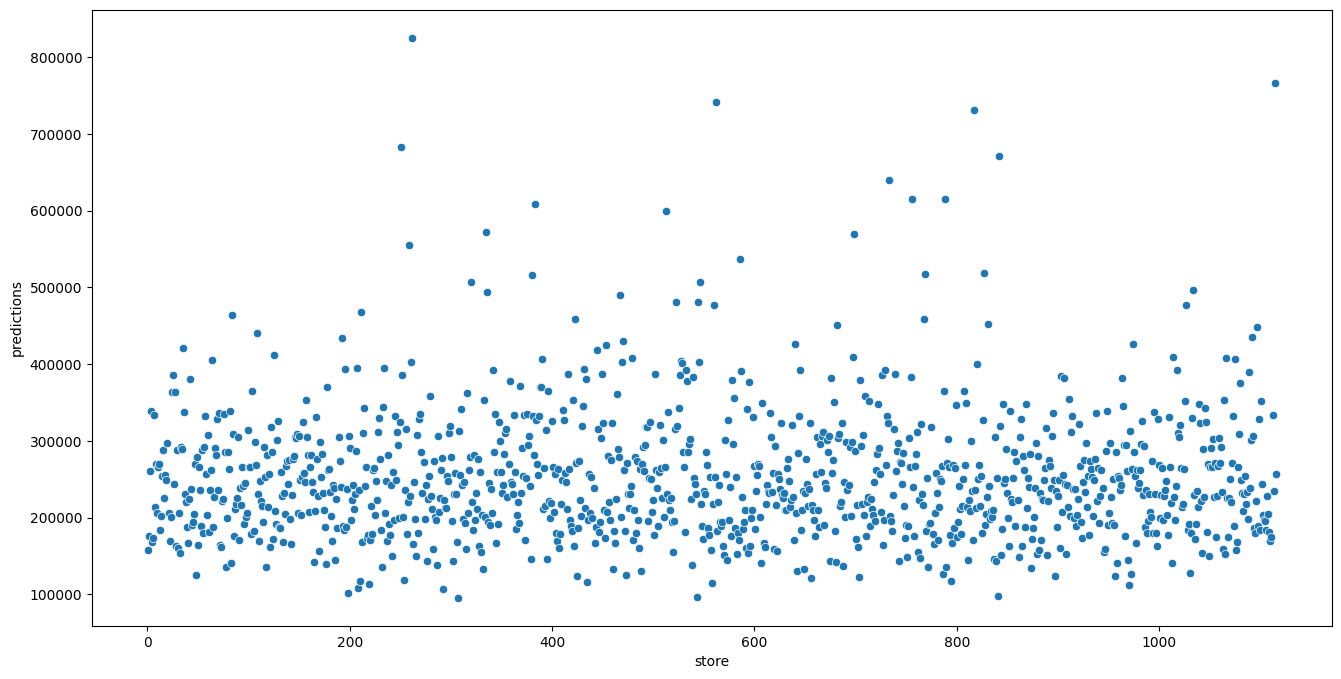

In [86]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='store', y='predictions', data=df92)

**Observação**:

O termo **acurácia** é usado apenas em **modelos de classificação**, pois mede a proporção de acertos do modelo. Já em **modelos de regressão**, não utilizamos acurácia. Nesses casos, avaliamos o desempenho do modelo por meio de **métricas de erro**, que indicam o quanto as previsões estão distantes dos valores reais.

## 9.2. Total Performance

In [87]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis=0 ).reset_index().rename(columns={'index': 'Scenario', 0: 'Values'})
df93['Values'] = df93['Values'].map('R${:,.2f}'.format)
df93

,Scenario,Values
0,predictions,"R$283,317,696.00"
1,worst_scenario,"R$282,612,768.06"
2,best_scenario,"R$284,022,615.38"


## 9.3. Machine Learning Performance

In [88]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

Text(0.5, 1.0, 'Error vs Predictions')

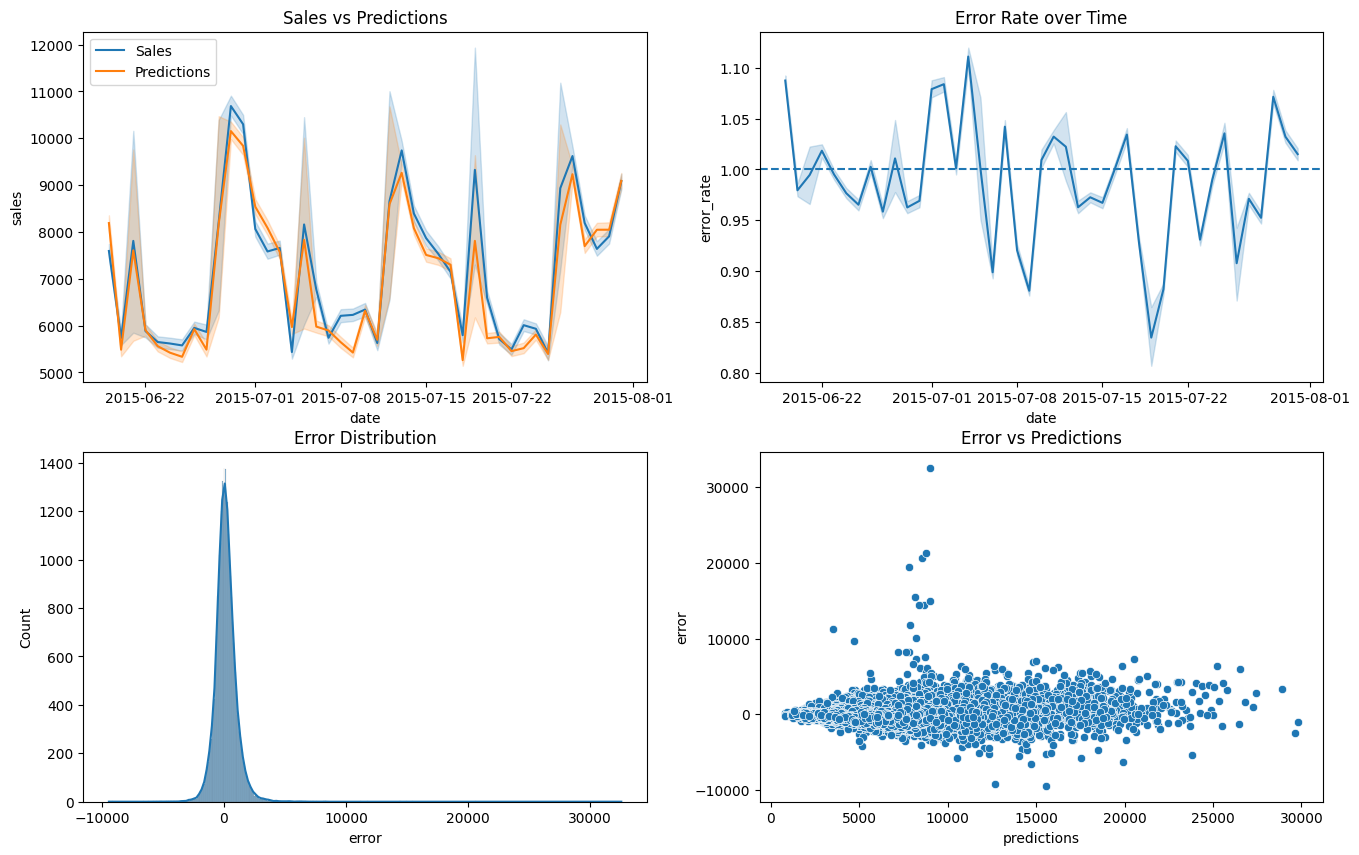

In [89]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='sales', data=df9, label='Sales')
sns.lineplot(x='date', y='predictions', data=df9, label='Predictions')
plt.title('Sales vs Predictions')

plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='error_rate', data=df9)
plt.axhline(1, linestyle='--')
plt.title('Error Rate over Time')

plt.subplot(2, 2, 3)
sns.histplot(df9['error'], kde=True)  # Updated from sns.distplot to sns.histplot as distplot is deprecated
plt.title('Error Distribution')

plt.subplot(2, 2, 4)
sns.scatterplot(x='predictions', y='error', data=df9)
plt.title('Error vs Predictions')

# 10.0. Passo 10 - Deploy model to production

In [96]:
# # Salvando o modelo
pickle.dump(xgb_model_tuned, open(r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao\model\model_rossman.pkl', 'wb'))

### 10.1 Rossmann Class

In [14]:
import pickle
import pandas as pd
import numpy as np
import inflection
import datetime
import math


class Rossmann(object):
    def __init__(self):
        self.home_path = r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao'
        self.competition_distance_scaler    = pickle.load( open( self.home_path + r'parameter\competition_distance_scaler.pkl', 'rb') )
        self.competition_time_month_scaler  = pickle.load( open( self.home_path + r'parameter\competition_time_month_scaler.pkl', 'rb') )
        self.promo_time_week_scaler         = pickle.load( open( self.home_path + r'parameter\promo_time_week_scaler.pkl', 'rb') )
        self.year_scaler                    = pickle.load( open( self.home_path + r'parameter\year_scaler.pkl', 'rb') )
        self.store_type_scaler              = pickle.load( open( self.home_path + r'parameter\store_type_scaler.pkl', 'rb') )

    def data_cleaning(self, df1):
        ## 1.1 Rename Columns
        cols_old = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo','StateHoliday', 'SchoolHoliday','StoreType', 
                    'Assortment', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

        snakecase = lambda x: inflection.underscore(x)

        cols_new = list(map(snakecase, cols_old))

        df1.columns = cols_new

        ## 1.3 Data Types
        df1['date'] = pd.to_datetime(df1['date'])

        ## 1.5 Fillout NA
        # competition_distance
        df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

        # competition_open_since_month
        df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

        # competition_open_since_year
        df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

        # promo2_since_week
        df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

        # promo2_since_year
        df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

        # promo_interval
        month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}

        df1['promo_interval'].fillna(0, inplace=True)

        df1['month_map'] = df1['date'].dt.month.map(month_map)

        df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

        ## 1.6 Change Types
        # competition
        df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
        df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

        # promo2
        df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
        df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

        return df1
    
    def feature_engineering(self, df2):
        # year
        df2['year'] = df2['date'].dt.year

        # month
        df2['month'] = df2['date'].dt.month

        # day
        df2['day'] = df2['date'].dt.day

        # week of year
        df2['week_of_year'] = df2['date'].dt.isocalendar().week

        # year week
        df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

        # competition since
        df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
        df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

        # promo since
        df2['promo_since'] = df2.apply(lambda x: datetime.datetime(year=x['promo2_since_year'], month=1, day=1) + datetime.timedelta(weeks=x['promo2_since_week']-1), axis=1)
        df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

        # assortment
        df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

        # state holiday
        df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

        # Filtrando apenas os dias em que a loja estava aberta
        df2 = df2[df2['open'] != 0]

        # Removendo colunas desnecessárias
        cols_drop = ['open', 'promo_interval', 'month_map']
        df2 = df2.drop(cols_drop, axis=1)

        return df2

    def data_preparation(self, df5):
        ## 5.2. Rescaling
        # competition distance
        df5['competition_distance'] = self.competition_distance_scaler.transform(df5[['competition_distance']].values)

        # competition time month
        df5['competition_time_month'] = self.competition_time_month_scaler.transform(df5[['competition_time_month']].values)

        # promo time week
        df5['promo_time_week'] = self.promo_time_week_scaler.transform(df5[['promo_time_week']].values)

        # year
        df5['year'] = self.year_scaler.transform(df5[['year']].values)

        ### 5.3.1 Encoding
        # state_holiday - One hot encondig
        df5 = pd.get_dummies(df5, columns=['state_holiday'], prefix='state_holiday')

        # store_type - Label Encoding
        df5['store_type'] = self.store_type_scaler.transform(df5['store_type'])

        # assortment - Ordinal Encoding
        assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
        df5['assortment'] = df5['assortment'].map(assortment_dict)

        ### 5.3.2 Nature Transformation
        # day of week
        df5['day_of_week_sin'] = df5['day_of_week'].apply(lambda x: np.sin(x * (2 * np.pi / 7)))
        df5['day_of_week_cos'] = df5['day_of_week'].apply(lambda x: np.cos(x * (2 * np.pi / 7)))

        # month
        df5['month_sin'] = df5['month'].apply(lambda x: np.sin(x * (2 * np.pi / 12)))
        df5['month_cos'] = df5['month'].apply(lambda x: np.cos(x * (2 * np.pi / 12)))

        # day
        df5['day_sin'] = df5['day'].apply(lambda x: np.sin(x * (2 * np.pi / 30)))
        df5['day_cos'] = df5['day'].apply(lambda x: np.cos(x * (2 * np.pi / 30)))

        # week of year
        df5['week_of_year_sin'] = df5['week_of_year'].apply(lambda x: np.sin(x * (2 * np.pi / 52)))
        df5['week_of_year_cos'] = df5['week_of_year'].apply(lambda x: np.cos(x * (2 * np.pi / 52)))

        cols_selected = ['store', 'promo', 'store_type', 'assortment','competition_distance', 
                         'competition_open_since_month','competition_open_since_year', 'promo2',
                         'promo2_since_week','promo2_since_year', 'competition_time_month','promo_time_week',
                         'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos','day_sin', 'day_cos',
                         'week_of_year_sin', 'week_of_year_cos']
        
        return df5[cols_selected]
    
    def get_prediction(self, model, original_data, test_data):
        # predictions
        pred = model.predict(test_data)

        # join pred into the original data
        original_data['predictions'] = np.expm1(pred)

        return original_data.to_json(orient='records', date_format='iso')

### 10.2 API Handler

In [59]:
import pickle
import pandas as pd
from flask              import Flask, request, Response
from rossmann.Rossmann  import Rossmann

# loading model
model = pickle.load(open(r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao\model\model_rossman.pkl', 'rb'))

# initialize API
app = Flask(__name__)

@app.route('/rossmann/predict', methods=['POST'])
def rossmann_predict():
    test_json = request.get_json()

    if test_json: # there is data
        if isinstance(test_json, dict): # unique example
            test_raw = pd.DataFrame(test_json, index=[0])
        
        else: # multiple examples
            test_raw = pd.DataFrame(test_json, columns=test_json[0].keys())
        
        # Instantiate Rossmann class
        pipeline = Rossmann()

        # data cleaning
        df1 = pipeline.data_cleaning(test_raw)

        # feature engineering
        df2 = pipeline.feature_engineering(df1)

        # data preparation
        df3 = pipeline.data_preparation(df2)

        # prediction
        df_response = pipeline.get_prediction(model, test_raw, df3)

        return df_response
    
    else:
        return Response('{}', status=200, mimetype='application/json')
    
# Run API
if __name__ == '__main__':
    app.run('0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.52:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Sep/2025 23:57:06] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [02/Sep/2025 23:57:06] "GET /favicon.ico HTTP/1.1" 404 -
192.168.0.52 - - [02/Sep/2025 23:57:10] "GET / HTTP/1.1" 404 -
192.168.0.52 - - [02/Sep/2025 23:57:10] "GET /favicon.ico HTTP/1.1" 404 -


### 10.3. API Tester

In [4]:
df10 = pd.read_csv(r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao\bases-rossmann\rossmann-store-sales\test.csv')
df_store_raw = pd.read_csv(r'C:\Users\bruno.freitas\Documents\repositorio\ds_em_producao\bases-rossmann\rossmann-store-sales\store.csv')
df_store = df_store_raw

In [5]:
df_test = pd.merge(df10, df_store, how='left', on='Store')
df_test = df_test[df_test['Store'].isin([22, 34, 36, 40])]
df_test = df_test[(df_test['Open'] != 0) & (~df_test['Open'].isna())]
df_test = df_test.drop(columns=['Id'], errors='ignore')

In [6]:
# merge test dataset
df_test = pd.merge(df10, df_store, how='left', on='Store')

# Choose stores for prediction
df_test = df_test[df_test['Store'].isin([22, 24, 30]) ]

# Remove closed days
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop('Id', axis=1)

In [17]:
df_test.sample(2)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
26557,30,1,2015-08-17,1.0,1,0,0,a,a,40.0,2.0,2014.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
23983,22,4,2015-08-20,1.0,1,0,1,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [18]:
row = df_test.head().to_dict(orient='records')
r = requests.post("https://teste-api-render-bzme.onrender.com/rossmann/predict",
                  headers={"Content-Type":"application/json"},
                  data=json.dumps(row))
print(r.status_code, r.text)


502 


In [ ]:
d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
d1.head()

In [12]:
# Convert DataFrame to JSON
data = json.dumps(df_test.to_dict(orient='records'))

In [19]:
# API Call
url = 'https://teste-api-render-bzme.onrender.com/rossmann/predict'
header = {'Content-type': 'application/json'}
data = data

r = requests.post(url, data=data, headers=header)
print('Status Code {}'.format(r.status_code))

Status Code 502


In [14]:
d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
d1.head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
d2 = d1[['Store', 'predictions']].groupby('Store').sum().reset_index()

for index, row in d2.iterrows():
    print('Store Number {}: Sales R${:,.2f} in the next 6 weeks'.format(
        row['Store'],
        row['predictions']
        ))


Store Number 22.0: Sales R$168,132.63 in the next 6 weeks
Store Number 24.0: Sales R$374,797.37 in the next 6 weeks
Store Number 30.0: Sales R$187,188.96 in the next 6 weeks


In [13]:
d2

,Store,predictions
0,22,168132.629639
1,24,374797.375000
2,30,187188.964355
